# Практикум Эчеверриа Арамбильета Антона, 316 (Python)

In [2]:
import math
import warnings
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.contingency_tables import mcnemar, StratifiedTable
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, roc_curve, auc

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## Презентация датасета

В датасете рассматриваются некоторые биологические показатели людей (кроме лёгочных). На основе этих данных предлагается предсказать, является ли человек курильщиком

In [3]:
df = pd.read_csv('smoker.csv')
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,93,144,53,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,115,225,196,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,102,206,48,79,116,12.0,1,0.6,24,20,17,0,1


In [7]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,99.342269,196.883491,126.749461,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,20.642741,36.353945,71.803143,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,219.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,423.000000,445.000000,999.000000,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [8]:
df.isnull().any()

age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
dental caries          False
smoking                False
dtype: bool

### В датасете отсутствуют какие-либо пропуски, что значительно упрощает дальнейший анализ

## Аппроксимация распределения данных с помощью ядерных оценок

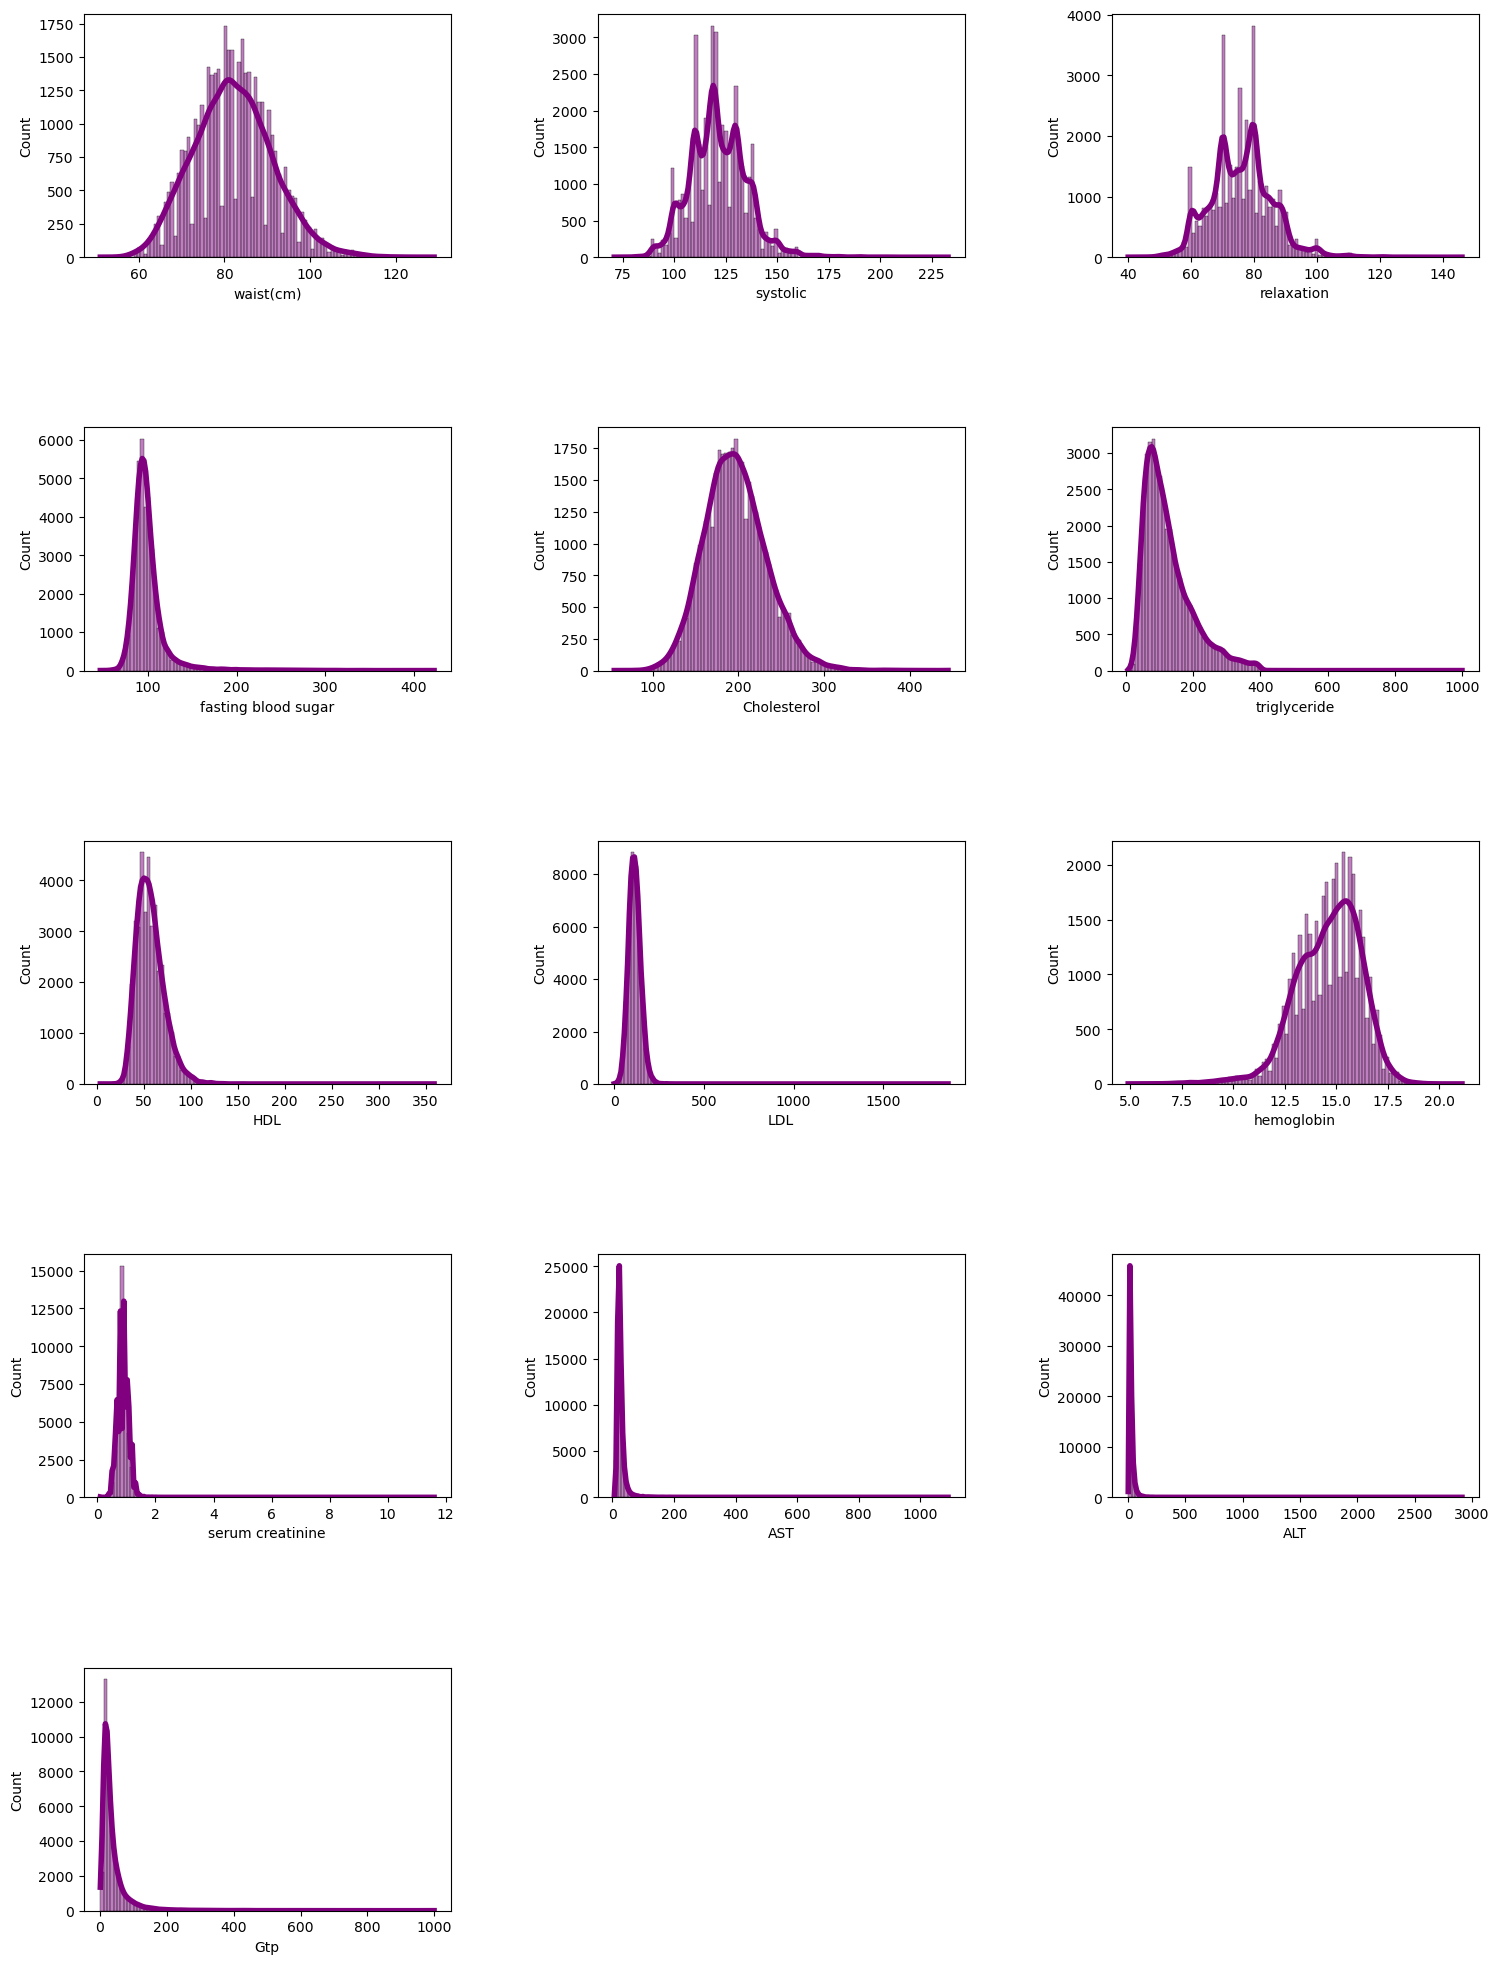

In [10]:
columns = ['waist(cm)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','ALT','Gtp']
length = len(columns)
plt.figure(figsize=(18, 30))

for i,j in zip(columns,range(length)):
    plt.subplot((length//2), 3, j+1)
    plt.subplots_adjust(wspace=.4, hspace=.7)
    sns.histplot(
        df[i],  
        kde=True,
        color='purple',
        bins=100,
        line_kws={'linewidth': 4, 'color': 'red'}
        )
    #plt.title(i)
plt.show()

In [12]:
df['serum creatinine'].unique()

array([ 1. ,  1.1,  0.6,  0.9,  1.2,  1.4,  0.7,  0.5,  0.8,  1.3,  1.7,
        0.4,  1.9,  1.6,  1.5,  0.1,  2.2,  0.3,  1.8,  3.3,  5.9,  2.1,
        7.4,  2.5,  2. ,  6.4,  3. , 11.6,  2.6,  0.2,  3.4,  9.9,  5. ,
       10. ])

Можно заметить, что признак 'serum creatinine' имеет довольно мало значений, чтобы считать его непрерывным, поэтому будем считать его дискретным

In [14]:
df['eyesight(left)'].unique()

array([0.9, 0.7, 0.8, 1.5, 1. , 1.2, 0.5, 0.3, 0.4, 0.6, 0.1, 0.2, 9.9,
       2. , 1.8, 1.6, 1.1, 1.3, 1.9])

<!-- Печеночные признаки ('ALT', 'AST', 'Gtp') имеют довольно тяжелые хвосты, что затрудняет дальнейший анализ. Поэтому будем только рассматривать эти признаки в рамках определенных ограничений -->

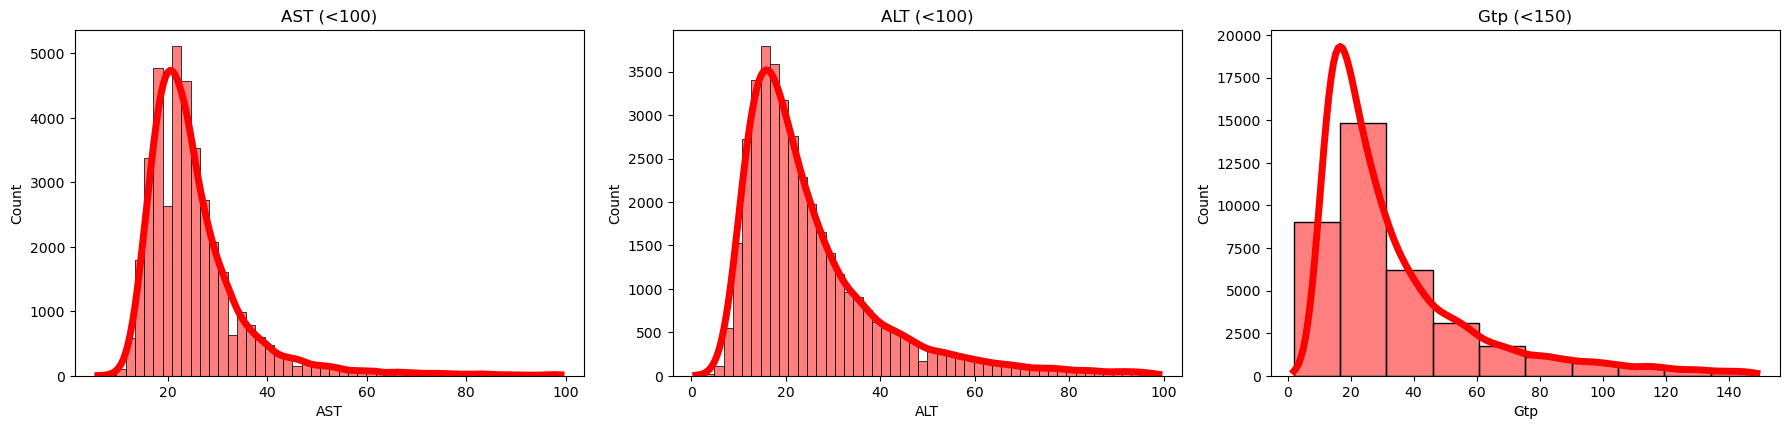

In [16]:
plt.figure(figsize=(18, 8))

# AST
plt.subplot(2, 3, 1)
df_for_ast = df[df['AST'] < 100]
sns.histplot(
    df_for_ast['AST'],
    kde=True,
    color='red',
    bins=50,
    line_kws={'linewidth': 5}
)
plt.title('AST (<100)')

# ALT
plt.subplot(2, 3, 2)
df_for_alt = df[df['ALT'] < 100]
sns.histplot(
    df_for_alt['ALT'],
    kde=True,
    color='red',
    bins=50,
    line_kws={'linewidth': 5}
)
plt.title('ALT (<100)')

# Gtp
plt.subplot(2, 3, 3)
df_for_gtp = df[df['Gtp'] < 150]
sns.histplot(
    df_for_gtp['Gtp'],  
    kde=True,
    color='red',
    bins=10,
    line_kws={'linewidth': 5}
)
plt.title('Gtp (<150)')

plt.tight_layout()
plt.show()


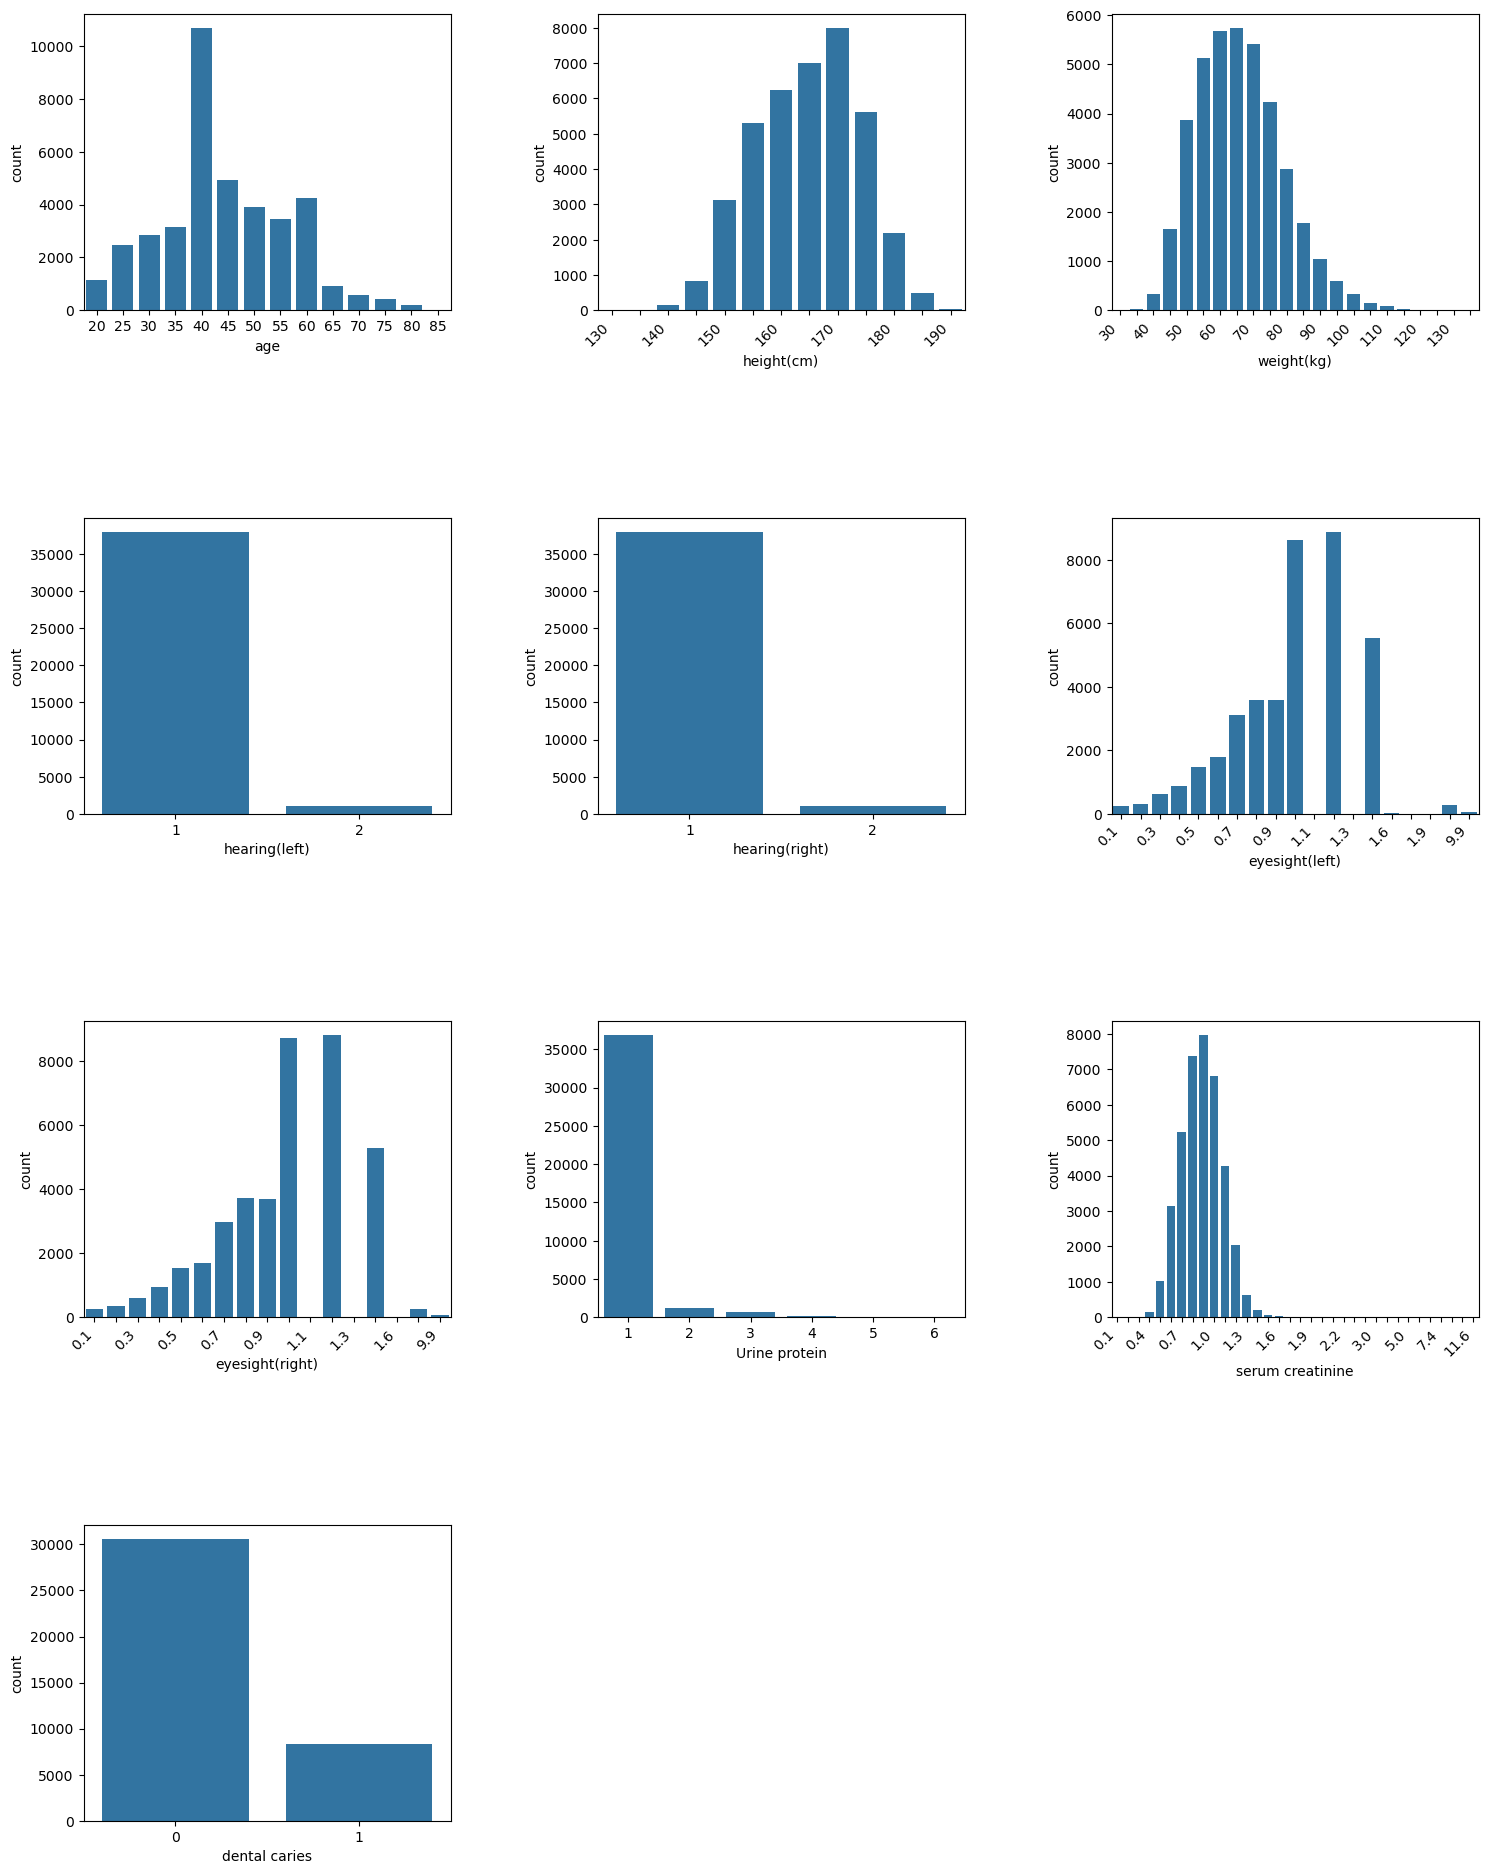

In [17]:
columns = ['age','height(cm)','weight(kg)','hearing(left)','hearing(right)','eyesight(left)','eyesight(right)','Urine protein','serum creatinine','dental caries']
length = len(columns)
plt.figure(figsize=(18, 30))

for i, j in zip(columns, range(length)):
    ax = plt.subplot((length//2), 3, j+1)
    plt.subplots_adjust(wspace=.4, hspace=.7)
    sns.countplot(
        x=i,
        data=df,
    )
    if i in ['height(cm)', 'weight(kg)', 'serum creatinine','eyesight(left)','eyesight(right)']:
        ticks = ax.get_xticklabels()
        step = 3 if i == 'serum creatinine' else 2
        new_labels = [tick.get_text() if idx % step == 0 else '' for idx, tick in enumerate(ticks)]
        ax.set_xticklabels(new_labels, rotation=45, ha='right')
    
plt.show()

In [12]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='hemoglobin', hue='smoking', fill=True)
plt.title('Hemoglobin KDE for Smoking vs Non-smoking')
plt.savefig('hemoglobin_smoking_kde.png', dpi=300, bbox_inches='tight')
plt.close()


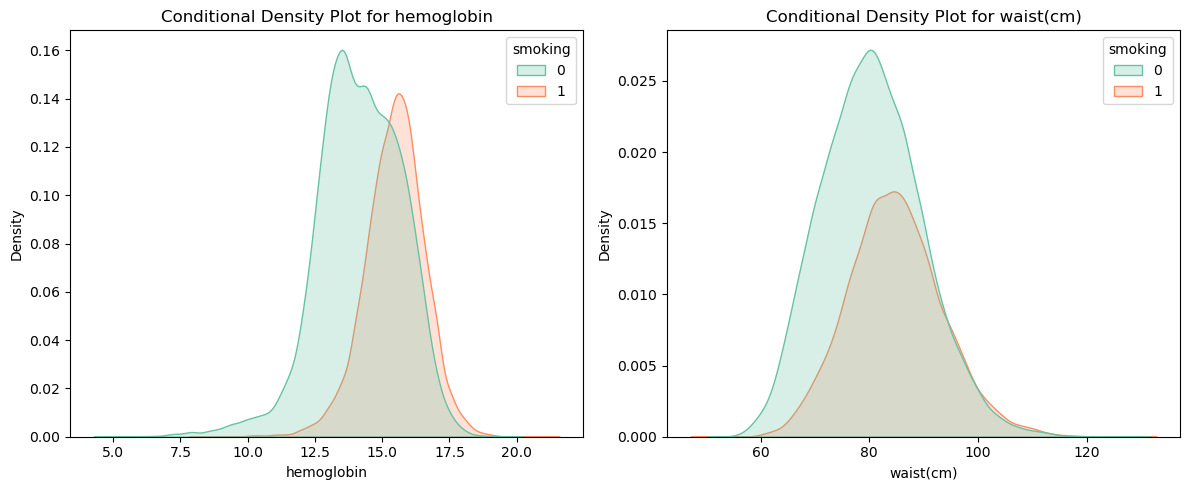

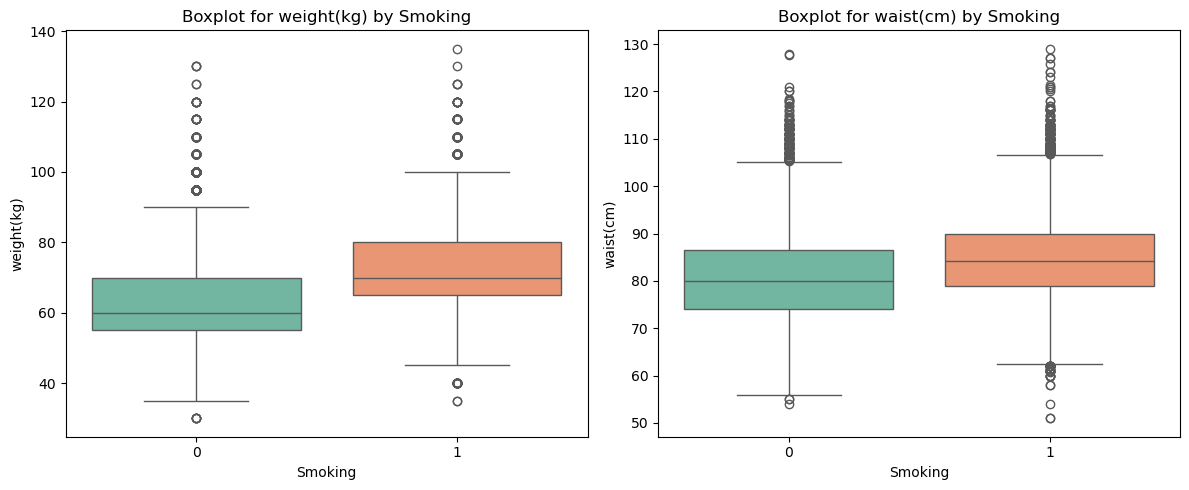

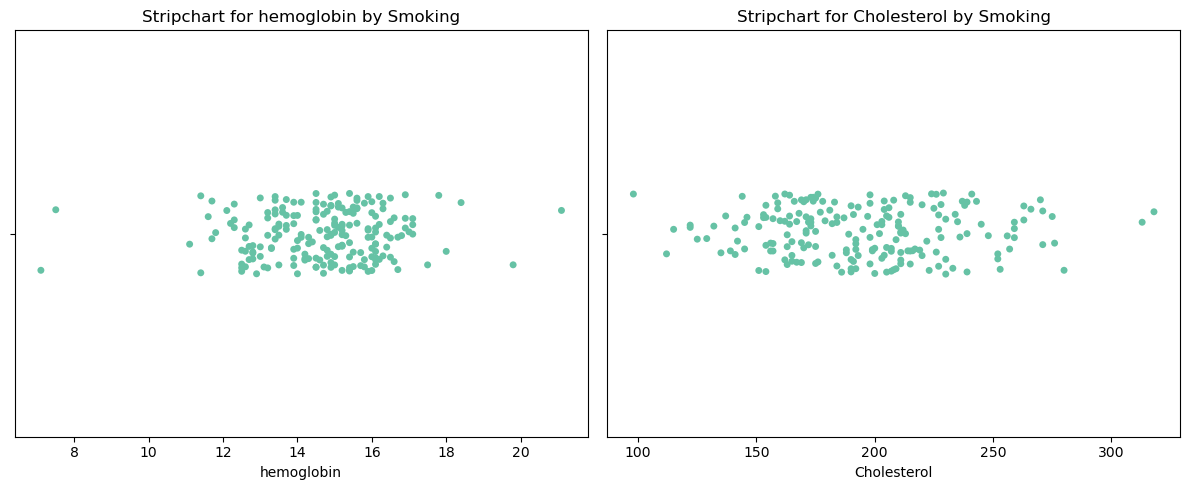

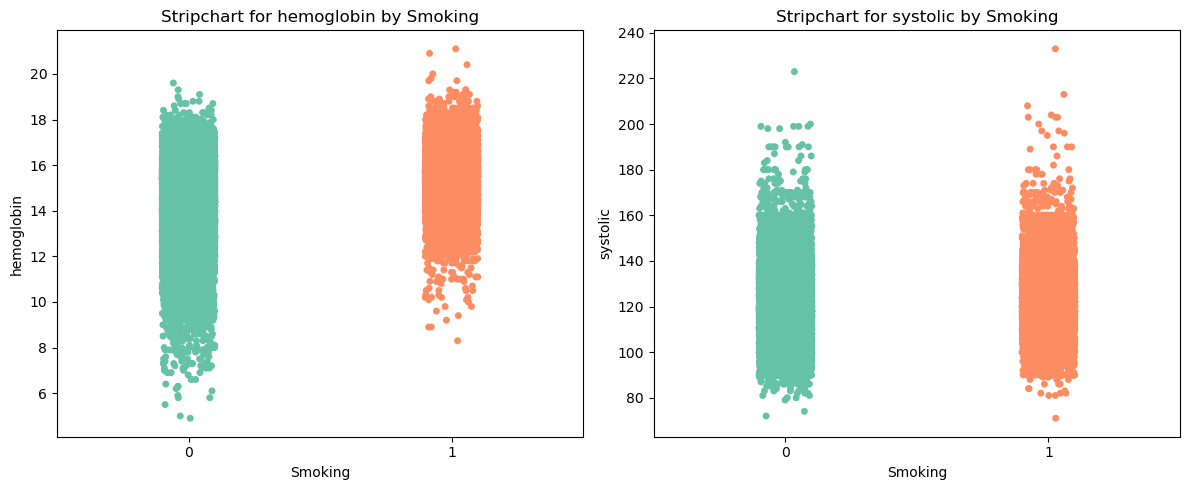

In [18]:
# 1. cdplot (sns.kdeplot)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, var in enumerate(['hemoglobin', 'waist(cm)']):
    sns.kdeplot(data=df, x=var, hue='smoking', fill=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Conditional Density Plot for {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()

# 2. boxplot (sns.boxplot)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, var in enumerate(['weight(kg)', 'waist(cm)']):
    sns.boxplot(data=df, x='smoking', y=var, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot for {var} by Smoking')
    axes[i].set_xlabel('Smoking')
    axes[i].set_ylabel(var)
plt.tight_layout()
plt.show()

# 3. stripchart (sns.stripplot)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, var in enumerate(['hemoglobin', 'Cholesterol']):
    sns.stripplot(data=df[:200], x=var, jitter=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Stripchart for {var} by Smoking')
    axes[i].set_xlabel(var)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, var in enumerate(['hemoglobin', 'systolic']):
    sns.stripplot(data=df, x='smoking', y=var, jitter=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Stripchart for {var} by Smoking')
    axes[i].set_xlabel('Smoking')
    axes[i].set_ylabel(var)
plt.tight_layout()
plt.show()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. CDPLOT (KDE with smoking)
# -----------------------------

for var, filename in [
    ("hemoglobin", "hemoglobin_cdplot.png"),
    ("waist(cm)", "waist_cdplot.png")
]:
    plt.figure(figsize=(7,5))
    sns.kdeplot(data=df, x=var, hue="smoking", fill=True, palette="Set2")
    plt.title(f"Conditional Density Plot for {var}")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()


# -----------------------------
# 2. BOXPLOT
# -----------------------------

for var, filename in [
    ("weight(kg)", "boxplot_weight.png"),
    ("waist(cm)", "boxplot_waist.png")
]:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x="smoking", y=var, palette="Set2")
    plt.title(f"Boxplot for {var} by Smoking")
    plt.xlabel("Smoking")
    plt.ylabel(var)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()


# -----------------------------
# 3. STRIPCHART (jitter only)
# -----------------------------

for var, filename in [
    ("hemoglobin", "strip_hemoglobin_jitter.png"),
    ("Cholesterol", "strip_cholesterol_jitter.png")
]:
    plt.figure(figsize=(7,5))
    sns.stripplot(data=df[:200], x=var, jitter=True, palette="Set2")
    plt.title(f"Stripchart for {var}")
    plt.xlabel(var)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()


# -----------------------------
# 4. STRIPCHART by Smoking
# -----------------------------

for var, filename in [
    ("hemoglobin", "strip_hemoglobin_smoking.png"),
    ("systolic", "strip_systolic_smoking.png")
]:
    plt.figure(figsize=(7,5))
    sns.stripplot(data=df, x="smoking", y=var, jitter=True, palette="Set2")
    plt.title(f"Stripchart for {var} by Smoking")
    plt.xlabel("Smoking")
    plt.ylabel(var)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()


# Анализ выбросов

In [20]:
def grubbs_test(data_col, alpha=0.05):
    n = len(data_col)
    if n < 3:
        return None
    mean = np.mean(data_col)
    std = np.std(data_col, ddof=1)
    if std == 0:
        return None
    abs_dev = np.abs(data_col - mean)
    G = np.max(abs_dev) / std
    t_val = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    G_crit = ((n - 1) / np.sqrt(n)) * np.sqrt(t_val**2 / (n - 2 + t_val**2))
    outlier_index = np.argmax(abs_dev)
    if G > G_crit:
        return outlier_index, data_col[outlier_index], G, G_crit
    return None

# Функция для Q-теста Диксона
def dixon_q_test(data_col, alpha=0.05):
    sorted_data = np.sort(data_col)
    n = len(sorted_data)
    if n < 3 or n > 30:
        return None, "Размер выборки не подходит для Q-теста Диксона (3 <= n <= 30)"
    Q_min = (sorted_data[1] - sorted_data[0]) / (sorted_data[-1] - sorted_data[0])
    Q_max = (sorted_data[-1] - sorted_data[-2]) / (sorted_data[-1] - sorted_data[0])
    
    # Таблица критических значений Q для α=0.05
    q_crit_table = {3: 0.94, 4: 0.76, 5: 0.64, 6: 0.56, 7: 0.51, 8: 0.47, 9: 0.44, 10: 0.41,
                    11: 0.38, 12: 0.37, 13: 0.35, 14: 0.34, 15: 0.33, 16: 0.32, 17: 0.31,
                    18: 0.30, 19: 0.30, 20: 0.29, 21: 0.29, 22: 0.28, 23: 0.28, 24: 0.27,
                    25: 0.27, 26: 0.27, 27: 0.26, 28: 0.26, 29: 0.26, 30: 0.26}
    Q_crit = q_crit_table.get(n, 0.26)
    
    outliers = []
    if Q_min > Q_crit:
        outliers.append((0, sorted_data[0], 'min'))
    if Q_max > Q_crit:
        outliers.append((n-1, sorted_data[-1], 'max'))
    return outliers if outliers else None

In [22]:
numerical_cols = ['Cholesterol', 'hemoglobin', 'ALT', 'AST', 'triglyceride', 'relaxation']

grubbs_results = {}
dixon_results = {}

# Применение тестов
for col in numerical_cols:
    col_data = df[col].dropna().values
    # Граббс на полных данных
    grubbs = grubbs_test(col_data)
    grubbs_results[col] = grubbs
    
    # Диксон на случайной выборке из 30
    if len(col_data) >= 30:
        sample = np.random.choice(col_data, 30, replace=False)
        dixon = dixon_q_test(sample)
        dixon_results[col] = dixon
    else:
        dixon_results[col] = None, "Выборка слишком мала"

In [24]:
print("Результаты теста Граббса:")
for col, res in grubbs_results.items():
    if res:
        print(f"{col}: Выброс в индексе {res[0]}, значение {res[1]}, G={res[2]:.2f} > G_crit={res[3]:.2f}")
    else:
        print(f"{col}: Выбросы не обнаружены")

print("\nРезультаты Q-теста Диксона (на случайной выборке из 30):")
for col, res in dixon_results.items():
    if isinstance(res, tuple):
        print(f"{col}: {res[1]}")
    elif res:
        for out in res:
            print(f"{col}: Выброс в отсортированном индексе {out[0]}, значение {out[1]}, тип {out[2]}")
    else:
        print(f"{col}: Выбросы не обнаружены")

Результаты теста Граббса:
Cholesterol: Выброс в индексе 18079, значение 445, G=6.83 > G_crit=4.84
hemoglobin: Выброс в индексе 16903, значение 4.9, G=6.21 > G_crit=4.84
ALT: Выброс в индексе 37664, значение 2914, G=92.20 > G_crit=4.84
AST: Выброс в индексе 2, значение 1090, G=55.48 > G_crit=4.84
triglyceride: Выброс в индексе 38655, значение 999, G=12.15 > G_crit=4.84
relaxation: Выброс в индексе 217, значение 146, G=7.25 > G_crit=4.84

Результаты Q-теста Диксона (на случайной выборке из 30):
Cholesterol: Выбросы не обнаружены
hemoglobin: Выбросы не обнаружены
ALT: Выброс в отсортированном индексе 29, значение 311, тип max
AST: Выбросы не обнаружены
triglyceride: Выбросы не обнаружены
relaxation: Выброс в отсортированном индексе 29, значение 98, тип max


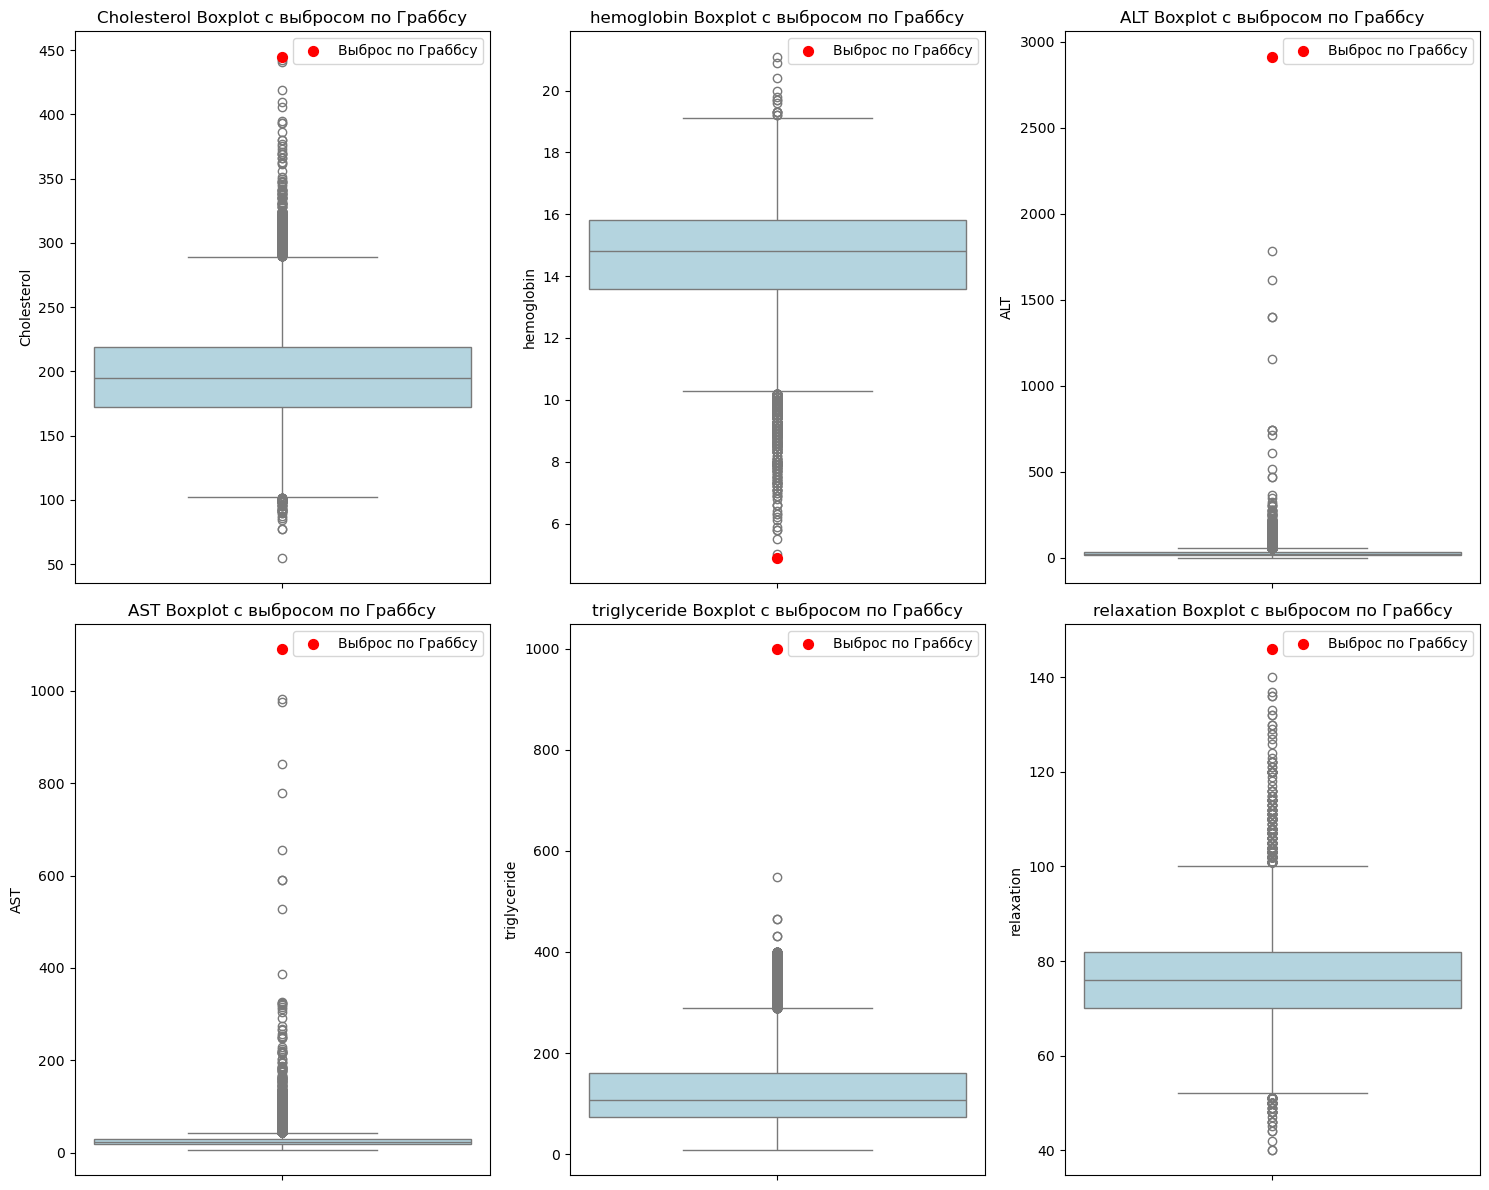

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
    if grubbs_results[col]:
        outlier_val = grubbs_results[col][1]
        axes[i].scatter(0, outlier_val, color='red', s=50, label='Выброс по Граббсу', zorder=3)
    axes[i].set_title(f'{col} Boxplot с выбросом по Граббсу')
    axes[i].legend()
plt.tight_layout()
plt.savefig("grubbs_outliers_boxplots.png")
plt.show()

# Анализ пропусков

### В данном датасете пропуски отсутствуют => сначала удалим определенное кол-во значений из каждого признака, а потом заполним двумя способами: заполнением средних и ЕМ-алгоритмом. Потом сравним, какой лучше

In [377]:
def em_imputation(data, max_iter=50, tol=1e-5):
    """
    EM-алгоритм для заполнения пропусков, предполагая multivariate normal распределение.
    data: pandas DataFrame с числовыми данными и NaN.
    """
    X = data.values.copy()
    n, p = X.shape
    missing = np.isnan(X)
    observed = ~missing
    
    # Инициализация: заполняем средними по наблюдаемым
    mu = np.nanmean(X, axis=0)
    Sigma = np.nanvar(X, axis=0) * np.eye(p)  # Начальная диагональная ковариация
    X[missing] = np.tile(mu, (n, 1))[missing]
    
    for iter in range(max_iter):
        mu_old = mu.copy()
        Sigma_old = Sigma.copy()
        
        # E-step: Вычисление conditional expectations для missing
        for i in range(n):
            miss_idx = missing[i]
            obs_idx = observed[i]
            if np.any(miss_idx):
                mu_miss = mu[miss_idx]
                mu_obs = mu[obs_idx]
                Sigma_mm = Sigma[np.ix_(miss_idx, miss_idx)]
                Sigma_mo = Sigma[np.ix_(miss_idx, obs_idx)]
                Sigma_oo = Sigma[np.ix_(obs_idx, obs_idx)]
                
                # Conditional mean
                try:
                    inv_Sigma_oo = np.linalg.inv(Sigma_oo)
                    cond_mu = mu_miss + Sigma_mo @ inv_Sigma_oo @ (X[i, obs_idx] - mu_obs)
                    X[i, miss_idx] = cond_mu
                except np.linalg.LinAlgError:
                    pass  # Если singular, пропустить
        
        # M-step: Обновление mu и Sigma
        mu = np.mean(X, axis=0)
        Sigma = np.cov(X, rowvar=False)
        
        # Проверка сходимости
        if np.linalg.norm(mu - mu_old) < tol and np.linalg.norm(Sigma - Sigma_old) < tol:
            break
    
    return pd.DataFrame(X, columns=data.columns, index=data.index)

In [379]:
numerical_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
                  'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
                  'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']

# Подвыборка для скорости (1000 строк; уберите .sample для полного датасета)
data_sample = df[numerical_cols].sample(1000, random_state=42).copy()

# Сохранение оригинала
original = data_sample.copy()

# Введение случайных пропусков (10%)
np.random.seed(42)  # Для воспроизводимости
mask = np.random.rand(*data_sample.shape) < 0.1
data_with_missing = data_sample.copy()
data_with_missing = data_with_missing.mask(mask)  # Безопасное создание NaN с автоматической конвертацией типов

# Проверка количества пропусков
missing_counts = data_with_missing.isnull().sum()
print("Количество пропусков по колонкам:\n", missing_counts)

Количество пропусков по колонкам:
 age                    102
height(cm)             104
weight(kg)              90
waist(cm)              102
eyesight(left)          93
eyesight(right)        103
systolic               106
relaxation             123
fasting blood sugar    105
Cholesterol             96
triglyceride            98
HDL                    118
LDL                     93
hemoglobin             116
serum creatinine       112
AST                     82
ALT                     98
Gtp                    100
dtype: int64


In [381]:
# Метод 1: Заполнение средними (mean imputation)
mean_imputed = data_with_missing.fillna(data_with_missing.mean())

# Расчет MAE для mean imputation (только по позициям с пропусками)
diff_mean = np.abs(mean_imputed - original).values[mask]
mae_mean = np.mean(diff_mean)

# Метод 2: EM-алгоритм imputation
em_imputed = em_imputation(data_with_missing)

# Расчет MAE для EM imputation
diff_em = np.abs(em_imputed - original).values[mask]
mae_em = np.mean(diff_em)

# Сравнение результатов
print("\nMAE для метода средних:", mae_mean)
print("MAE для EM-алгоритма:", mae_em)

# Вывод: какой метод лучше (меньший MAE)
if mae_mean < mae_em:
    print("Метод средних лучше (меньший MAE).")
elif mae_em < mae_mean:
    print("ЕМ-алгоритм лучше (меньший MAE).")
else:
    print("MAE одинаковы.")


MAE для метода средних: 12.150072207203669
MAE для EM-алгоритма: 5.662807809631687
ЕМ-алгоритм лучше (меньший MAE).


In [382]:
print("\nПримеры заполненных значений (по 10 для каждой категории с пропусками):")
for col in numerical_cols:
    missing_indices = data_with_missing.index[data_with_missing[col].isna()]
    if len(missing_indices) > 0:
        # Берем первые 10 индексов с пропусками (если меньше 10, то все)
        sample_indices = missing_indices[:min(5, len(missing_indices))]
        original_vals = original.loc[sample_indices, col].values
        mean_vals = mean_imputed.loc[sample_indices, col].values
        em_vals = em_imputed.loc[sample_indices, col].values
        
        print(f"{col}:")
        print(f"  {list(original_vals)}")
        print(f"  {list(mean_vals)}")
        print(f"  {list(em_vals)}")


Примеры заполненных значений (по 10 для каждой категории с пропусками):
age:
  [np.int64(30), np.int64(45), np.int64(55), np.int64(45), np.int64(50)]
  [np.float64(43.97550111358574), np.float64(43.97550111358574), np.float64(43.97550111358574), np.float64(43.97550111358574), np.float64(43.97550111358574)]
  [np.float64(44.73871373227232), np.float64(52.938294763338135), np.float64(42.240756533076095), np.float64(40.1607919849949), np.float64(44.35928613251886)]
height(cm):
  [np.int64(170), np.int64(180), np.int64(170), np.int64(175), np.int64(165)]
  [np.float64(164.81026785714286), np.float64(164.81026785714286), np.float64(164.81026785714286), np.float64(164.81026785714286), np.float64(164.81026785714286)]
  [np.float64(171.45259177342666), np.float64(170.34835913367093), np.float64(170.6188243619337), np.float64(178.11540998592722), np.float64(169.35890817948604)]
weight(kg):
  [np.int64(50), np.int64(70), np.int64(65), np.int64(65), np.int64(75)]
  [np.float64(65.64285714285714)

# Анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности

In [30]:
def distribution(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

In [233]:
def normality_analysis(data, sample_size):
    print(f"Объем выборки: {sample_size}")
    
    tests = {
        "Колмогорова-Смирнова": stats.kstest(data, 'norm', args=(np.mean(data), np.std(data))),
        "Критерий Шапиро-Уилка": stats.shapiro(data),
        "Критерий Андерсона-Дарлинга": stats.anderson(data, dist='norm'),
        "Критерий Крамера-фон Мизеса": stats.cramervonmises(data, 'norm'),
        "Критерий Колмогорова (Лиллиефорса)": stats.kstest(data, 'norm', args=(np.mean(data), np.std(data, ddof=1))),
        "Критерий Колмогорова (Шапиро-Франсия)": stats.kstest(data, 'norm', args=(np.mean(data), stats.tstd(data))),
    }
    
    for name, result in tests.items():
        print(f"{name}: {result}\n")
    
    plt.figure(figsize=(20, 14))
    
    plt.subplot(5, 3, 1)
    sns.histplot(data, kde=True, stat='density', bins=20)
    plt.title('Гистограмма и KDE')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    
    plt.subplot(5, 3, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q график')

    x, y = distribution(data)
    plt.subplot(5, 3, 3)
    plt.step(x, y, where='post')
    plt.title('Эмпирическая функция распределения')
    plt.xlabel('Значения')
    plt.ylabel('Доля наблюдений')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

In [235]:
def env(data, data_name="", color="blue", confidence=0.99):
    data_sorted = np.sort(data)
    n = len(data)
    (osm, osr), (slope, intercept, r) = stats.probplot(data, dist="norm")
    plt.scatter(osm, osr, color=color, edgecolor="black", label="Data")
    plt.plot(osm, slope * osm + intercept, color=color, lw=2, label="Q-Q Line")
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    se = (slope / np.sqrt(n)) * np.sqrt(1 + osm ** 2)
    upper_bound = slope * osm + intercept + z * se
    lower_bound = slope * osm + intercept - z * se
    plt.fill_between(osm, lower_bound, upper_bound, color=color, alpha=0.2, label=f"{int(confidence * 100)}% Envelope")
    plt.xlabel("Квантили нормального распределения")
    plt.ylabel("Наблюдаемые квантили")
    plt.title(f"Метод огибающих для нормальной выборки {data_name}")
    plt.legend(loc="best")
    plt.savefig(f"data")
    plt.show()


 Графики для mu = 0, sigma = 1 

Объем выборки: 50
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.09611690717501792), pvalue=np.float64(0.7085911869357966), statistic_location=np.float64(-0.37931957790128534), statistic_sign=np.int8(-1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9733649956813989), pvalue=np.float64(0.3154852120399829))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.4229019326947281), critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(-0.2247107255725171), scale=np.float64(0.9711282861047399))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=0.17457602950255402, pvalue=0.32336944540211243)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.09675353081999988), pvalue=np.float64(0.70104630522

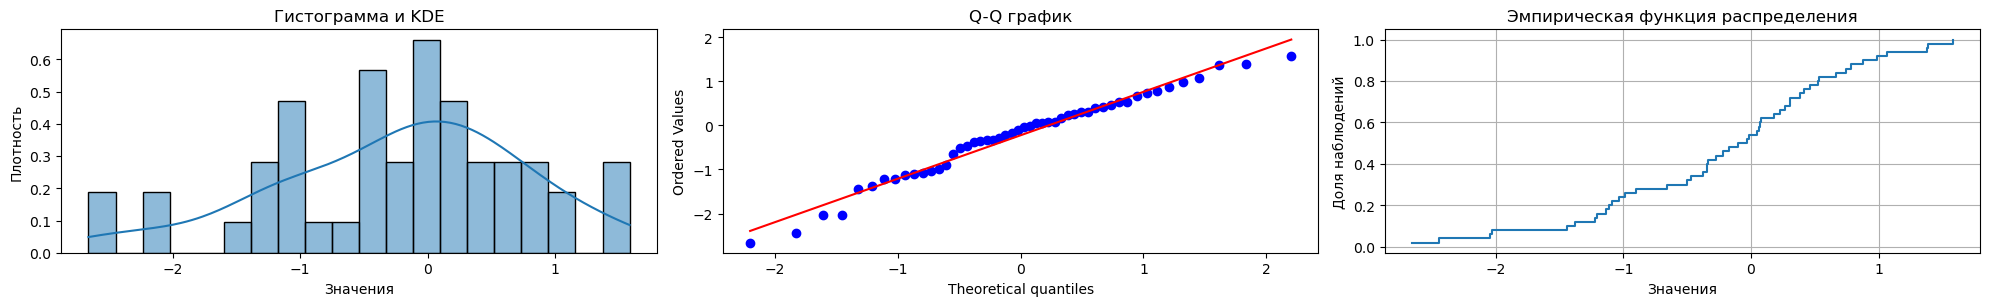

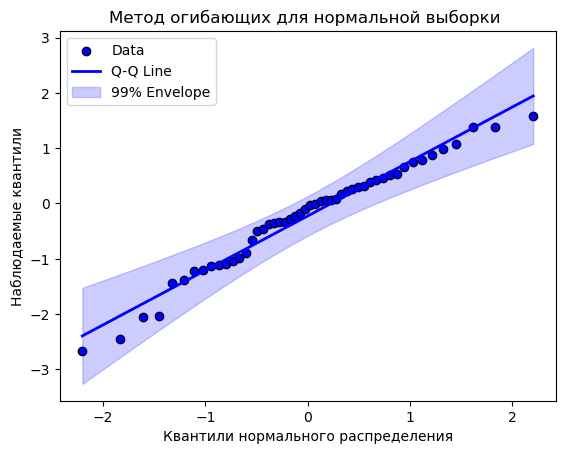




Объем выборки: 1000
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.01856239745675753), pvalue=np.float64(0.8744928030686355), statistic_location=np.float64(-0.3409146410415479), statistic_sign=np.int8(1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9985151582560455), pvalue=np.float64(0.5645579631973776))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.41129843924409215), critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(-0.003023614080961213), scale=np.float64(0.9904973727004535))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=0.05858755453696, pvalue=0.822990412576362)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.018498151341422964), pvalue=np.float64(0.8770806952159572), statistic_location=np.fl

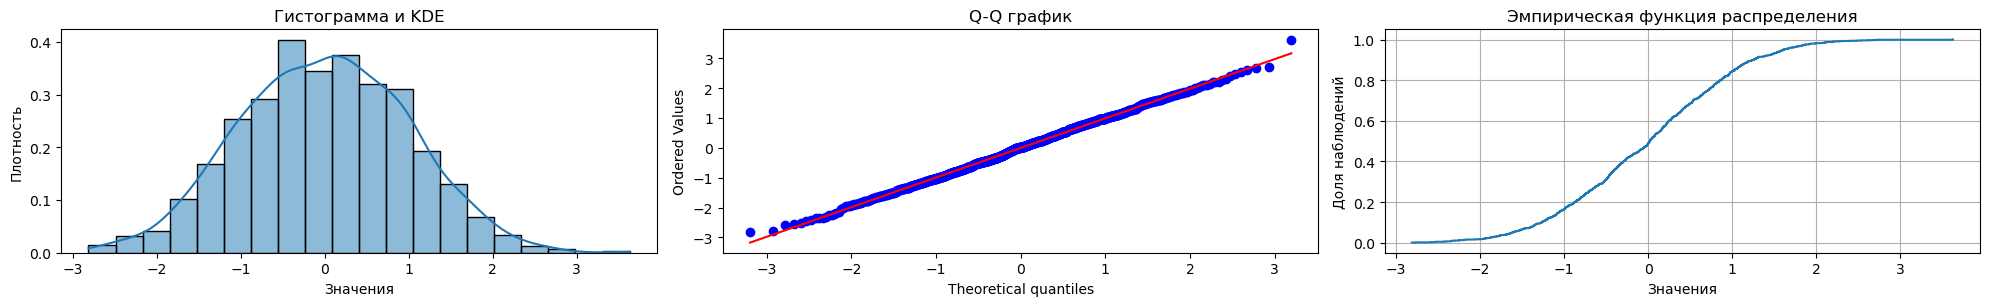

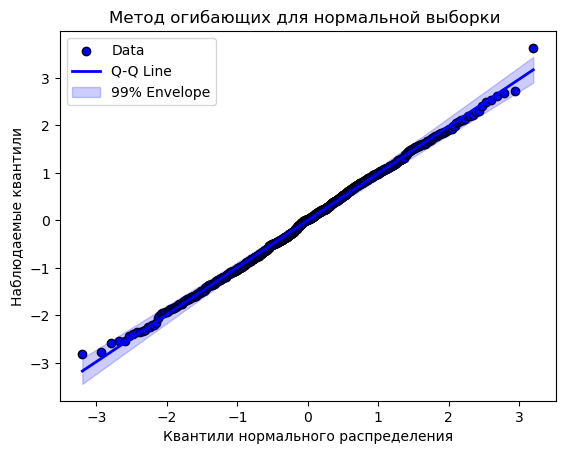





 Графики для mu = 100, sigma = 15 

Объем выборки: 50
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.11642331728637617), pvalue=np.float64(0.47179212944582893), statistic_location=np.float64(99.25336516147497), statistic_sign=np.int8(-1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9705771486605335), pvalue=np.float64(0.2442630824572446))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.5416383454219158), critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(99.38562436458886), scale=np.float64(14.901730188945608))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.11655837701707256), pvalue=np.float64(0.47032617

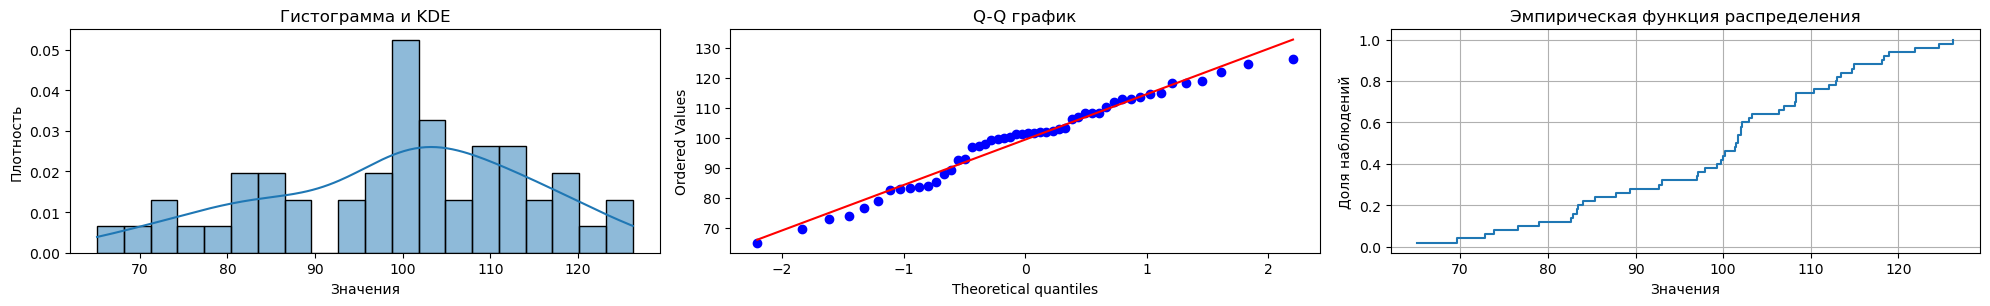

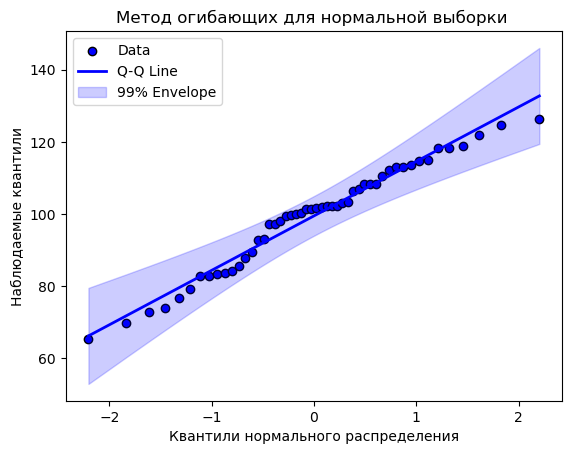




Объем выборки: 1000
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.02230589206708128), pvalue=np.float64(0.6935852905043784), statistic_location=np.float64(95.66617529062802), statistic_sign=np.int8(-1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9973470994184164), pvalue=np.float64(0.10121793342271174))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.6102450085534201), critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(99.54683488328985), scale=np.float64(14.914342179477613))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=333.3333333333333, pvalue=0.0)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.022356103044903652), pvalue=np.float64(0.6909222639089265), statistic_location=np.float64(95.666175290

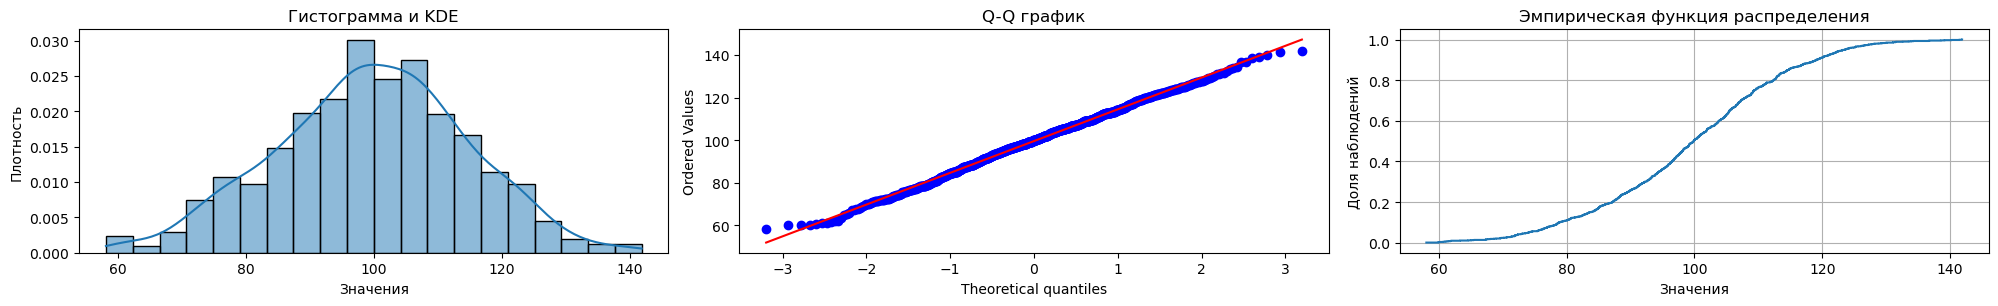

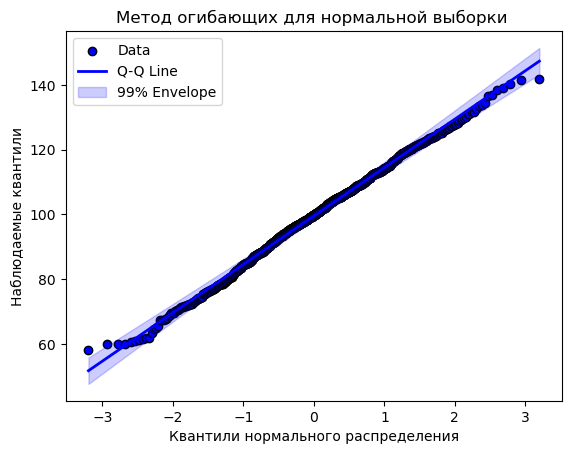

In [237]:
mu = 0
sigma = 1 
sizes = [50, 1000]
params = [[0,1], [100, 15]]
for mu, sigma in params:
    print(f'\n Графики для mu = {mu}, sigma = {sigma} \n')
    for sample_size in sizes:
        data = np.random.normal(mu, sigma, sample_size)
        normality_analysis(data, sample_size)
        env(data)
        print('\n\n')


# Анализ исходных данных с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности

In [223]:
def distribution(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

In [276]:
def normality_analysis(data, sample_size, names):
    print(f"Объем выборки: {sample_size}")
    
    tests = {
        "Колмогорова-Смирнова": stats.kstest(data, 'norm', args=(np.mean(data), np.std(data))),
        "Критерий Шапиро-Уилка": stats.shapiro(data),
        "Критерий Андерсона-Дарлинга": stats.anderson(data, dist='norm'),
        "Критерий Крамера-фон Мизеса": stats.cramervonmises(data, 'norm'),
        "Критерий Колмогорова (Лиллиефорса)": stats.kstest(data, 'norm', args=(np.mean(data), np.std(data, ddof=1))),
        "Критерий Колмогорова (Шапиро-Франсия)": stats.kstest(data, 'norm', args=(np.mean(data), stats.tstd(data))),
    }
    
    for name, result in tests.items():
        print(f"{name}: {result}\n")
    
    plt.figure(figsize=(20, 14))
    
    plt.subplot(5, 3, 1)
    sns.histplot(data, kde=True, stat='density', bins=20)
    plt.title('Гистограмма и KDE')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    
    plt.subplot(5, 3, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q график')

    x, y = distribution(data)
    plt.subplot(5, 3, 3)
    plt.step(x, y, where='post')
    plt.title('Эмпирическая функция распределения')
    plt.xlabel('Значения')
    plt.ylabel('Доля наблюдений')
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"all_{names}_{sample_size}.png", dpi=300, bbox_inches="tight")
    plt.tight_layout()
    plt.show()

In [278]:
def env(data, names, data_name="", color="blue", confidence=0.99):
    data_sorted = np.sort(data)
    n = len(data)
    (osm, osr), (slope, intercept, r) = stats.probplot(data, dist="norm")
    plt.scatter(osm, osr, color=color, edgecolor="black", label="Data")
    plt.plot(osm, slope * osm + intercept, color=color, lw=2, label="Q-Q Line")
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    se = (slope / np.sqrt(n)) * np.sqrt(1 + osm ** 2)
    upper_bound = slope * osm + intercept + z * se
    lower_bound = slope * osm + intercept - z * se
    plt.fill_between(osm, lower_bound, upper_bound, color=color, alpha=0.2, label=f"{int(confidence * 100)}% Envelope")
    plt.xlabel("Квантили нормального распределения")
    plt.ylabel("Наблюдаемые квантили")
    plt.title(f"Метод огибающих для нормальной выборки {data_name}")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig(f"ogib_{names}_{len(data)}.png", dpi=300, bbox_inches="tight")
    plt.show()


Графики для Cholesterol

Объем выборки: 38984
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.030722199201421052), pvalue=np.float64(2.116973935447384e-32), statistic_location=np.int64(201), statistic_sign=np.int8(1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9906366010759441), pvalue=np.float64(4.881385976585574e-43))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(57.523622639331734), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(196.88349066283604), scale=np.float64(36.35394457927984))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=12994.666666666668, pvalue=0.0)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.030722774900185823), pvalue=np.float64(2.111140092328134e-32), statistic_location=np.int

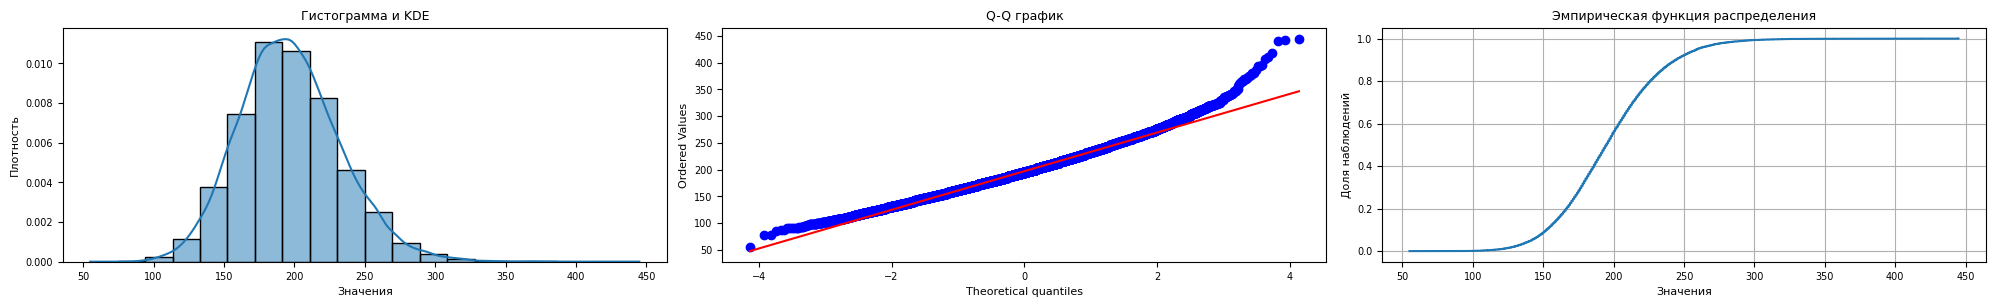


Графики для первых 1000 значений в Cholesterol
Объем выборки: 1000
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.03631905854710554), pvalue=np.float64(0.13949245461752546), statistic_location=np.int64(184), statistic_sign=np.int8(1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.993552514455157), pvalue=np.float64(0.0002565789177671043))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(1.6583605593496031), critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(195.264), scale=np.float64(36.79054019510787))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=333.3333333333333, pvalue=0.0)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.0362607412468266), pvalue=np.float64(0.1406829949886088), statistic_location=np.int

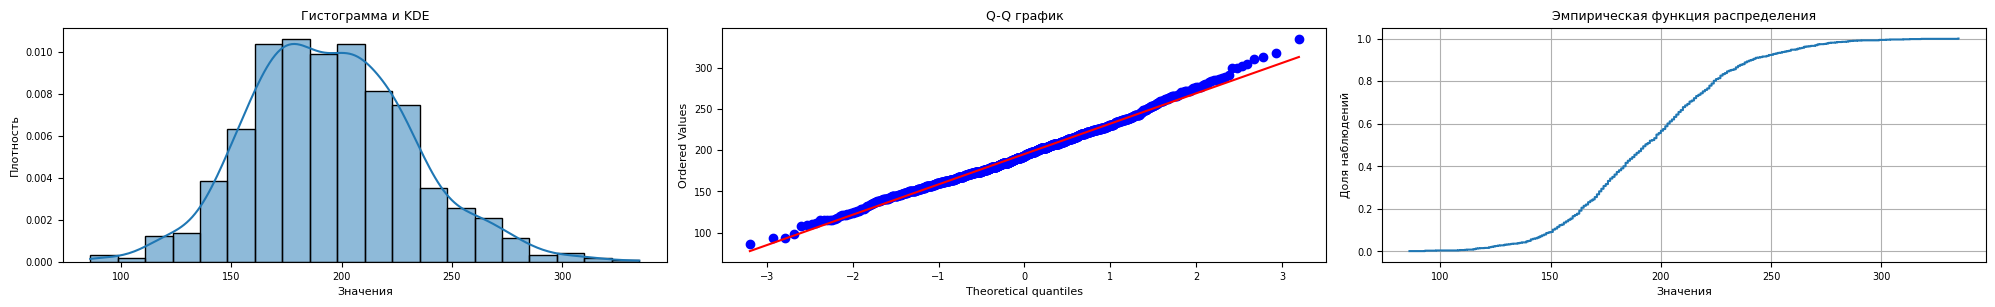

In [280]:
print(f'\nГрафики для Cholesterol\n')
normality_analysis(df['Cholesterol'], len(df['Cholesterol']), "Cholesterol")
print(f'\nГрафики для первых 1000 значений в Cholesterol')
normality_analysis(df['Cholesterol'][:1000], len(df['Cholesterol'][:1000]), "Cholesterol")

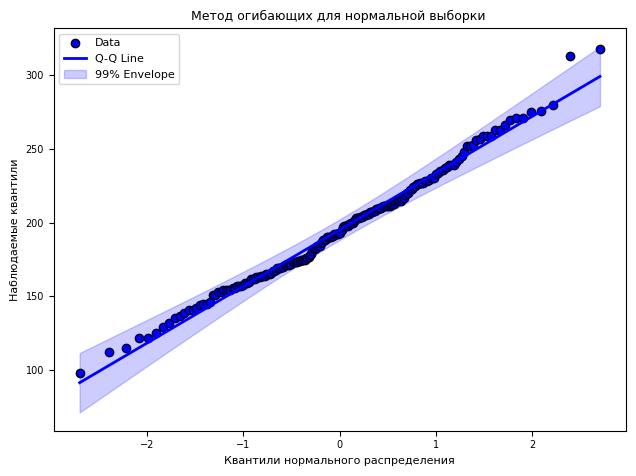

In [281]:
env(df['Cholesterol'][:200], "Cholesterol")

### => не опровергается гипотеза о нормальном распределении для "Cholesterol"
(Шапиро опровергает из-за небольшого хвоста справа)


Графики для waist(cm)

Объем выборки: 38984
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.02674372149734694), pvalue=np.float64(1.1782343198900263e-24), statistic_location=np.float64(82.0), statistic_sign=np.int8(1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9952187285823975), pvalue=np.float64(1.1144213289328915e-32))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(26.098033030903025), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(82.0621152267597), scale=np.float64(9.326797968831224))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=12994.666666666668, pvalue=0.0)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.02674368742061789), pvalue=np.float64(1.1784018502330609e-24), statistic_location=np.flo

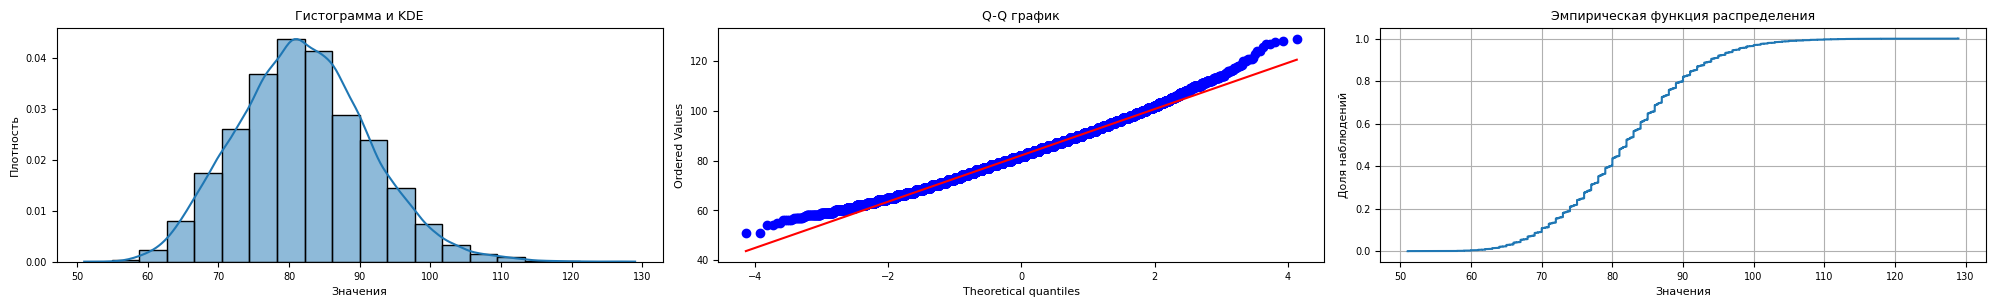


Графики для первых 1000 значений в waist(cm)
Объем выборки: 1000
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.047994835395159474), pvalue=np.float64(0.01930842911677407), statistic_location=np.float64(84.0), statistic_sign=np.int8(1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9943702884224573), pvalue=np.float64(0.0008507830860487315))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(1.0900670257814227), critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(82.3399), scale=np.float64(9.554256737800792))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=333.3333333333333, pvalue=0.0)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.048029000609673966), pvalue=np.float64(0.019181615518423102), statistic_location

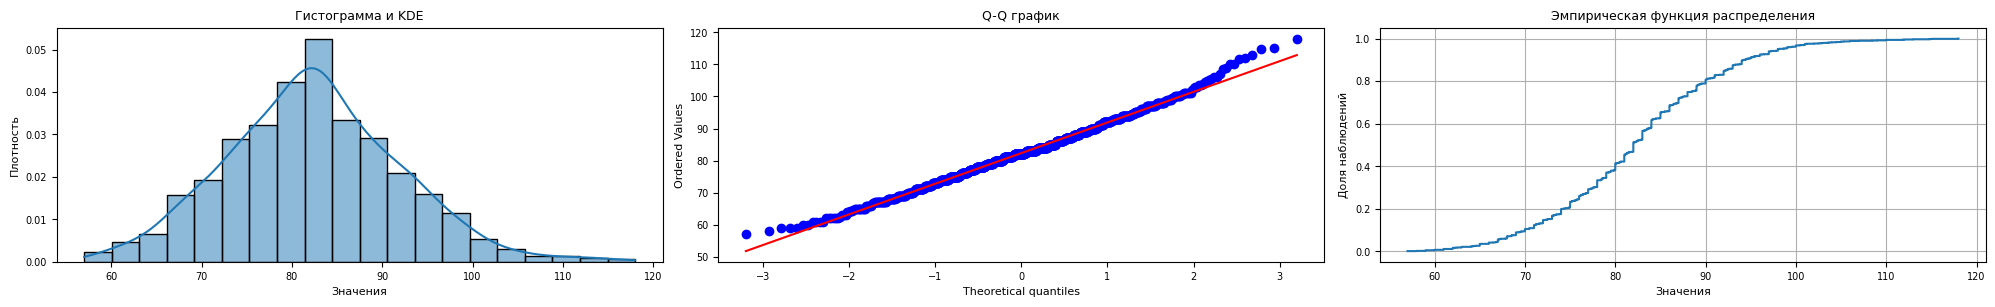


Графики для первых 500 значений в waist(cm)
Объем выборки: 500
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.04075609728119389), pvalue=np.float64(0.3674157002521532), statistic_location=np.float64(84.0), statistic_sign=np.int8(1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.9941694749802251), pvalue=np.float64(0.052691640277662495))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(0.5177165069085277), critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(82.93339999999999), scale=np.float64(9.8303354688872))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=166.66666666666666, pvalue=0.0)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.040799193228562736), pvalue=np.float64(0.36614021144265874), statistic_locat

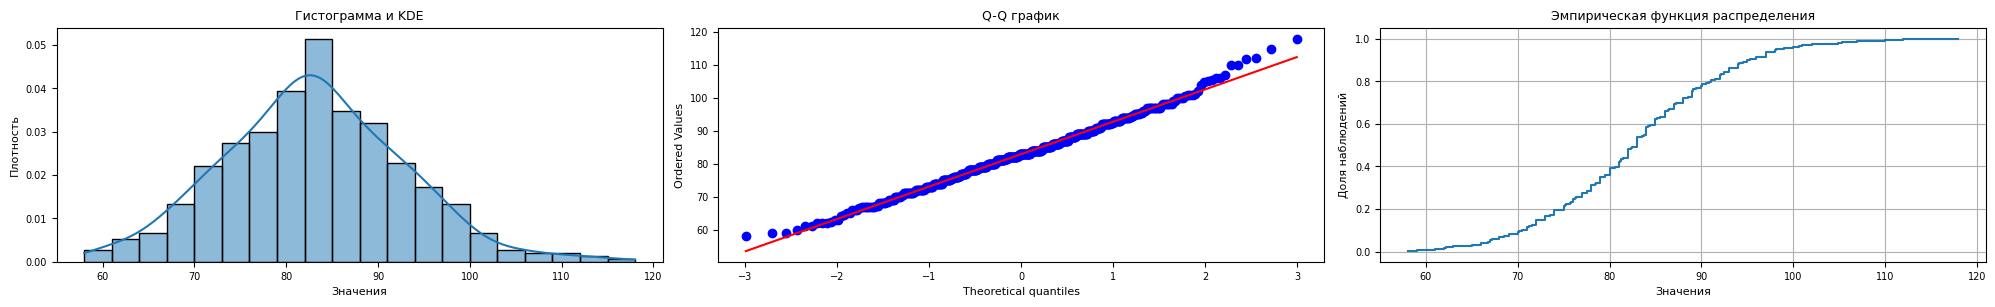

In [285]:
print(f'\nГрафики для waist(cm)\n')
normality_analysis(df['waist(cm)'], len(df['waist(cm)']), "waist(cm)")
print(f'\nГрафики для первых 1000 значений в waist(cm)')
normality_analysis(df['waist(cm)'][:1000], len(df['waist(cm)'][:1000]), "waist(cm)")
print(f'\nГрафики для первых 500 значений в waist(cm)')
normality_analysis(df['waist(cm)'][:500], len(df['waist(cm)'][:500]), "waist(cm)")

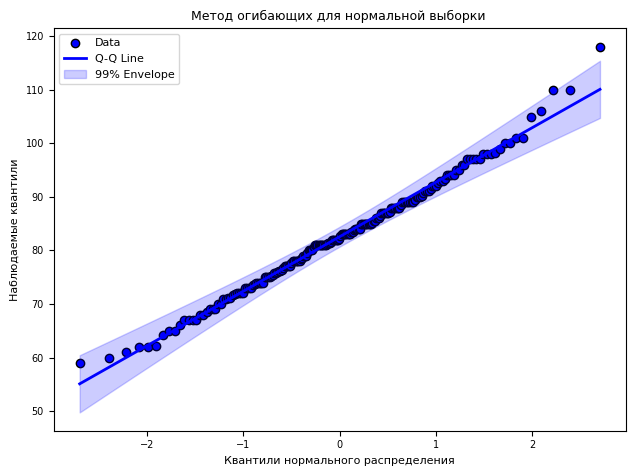

In [286]:
env(df['waist(cm)'][:200], "waist(cm)")

### => не опровергается гипотеза о нормальном распределении для "waist(cm)" для небольшой выборки


Графики для triglyceride

Объем выборки: 38984
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.11449006755634583), pvalue=np.float64(0.0), statistic_location=np.int64(119), statistic_sign=np.int8(1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.8907035596742168), pvalue=np.float64(1.3849406042334211e-93))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(1172.6953971650364), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(126.74946131746357), scale=np.float64(71.80314269616821))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=12994.666666666668, pvalue=0.0)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.11448951852050276), pvalue=np.float64(0.0), statistic_location=np.int64(119), statistic_sign=np.int8(1))


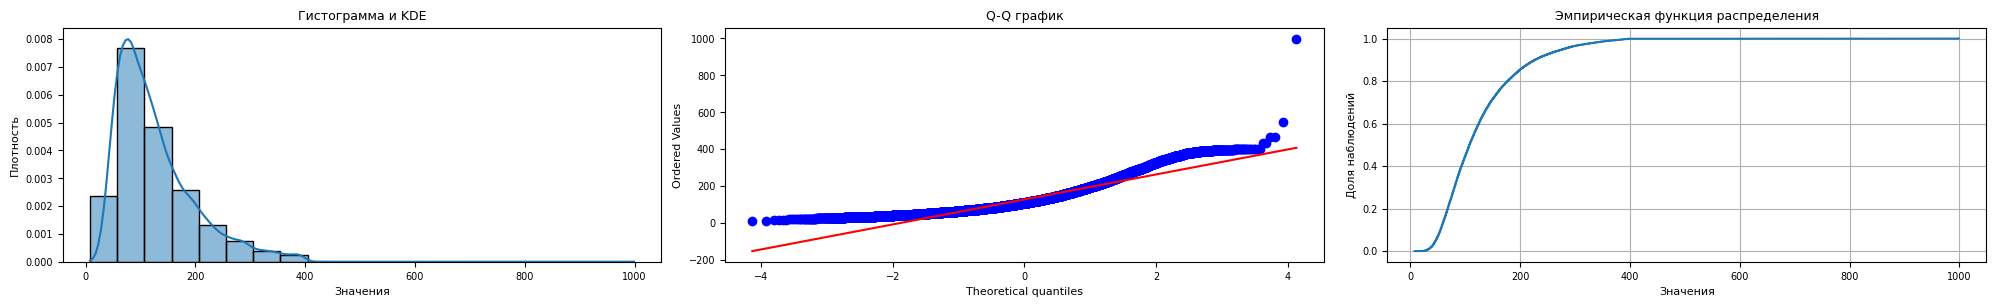


Графики для первых 1000 значений в triglyceride
Объем выборки: 1000
Колмогорова-Смирнова: KstestResult(statistic=np.float64(0.11708023759826092), pvalue=np.float64(2.121729281162892e-12), statistic_location=np.int64(130), statistic_sign=np.int8(1))

Критерий Шапиро-Уилка: ShapiroResult(statistic=np.float64(0.898868728680549), pvalue=np.float64(3.8804540577103467e-25))

Критерий Андерсона-Дарлинга: AndersonResult(statistic=np.float64(27.826648465113976), critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(129.469), scale=np.float64(72.58893988200403))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Критерий Крамера-фон Мизеса: CramerVonMisesResult(statistic=333.3333333333333, pvalue=0.0)

Критерий Колмогорова (Лиллиефорса): KstestResult(statistic=np.float64(0.11708169781856159), pvalue=np.float64(2.1202681245946944e-12), statistic_locati

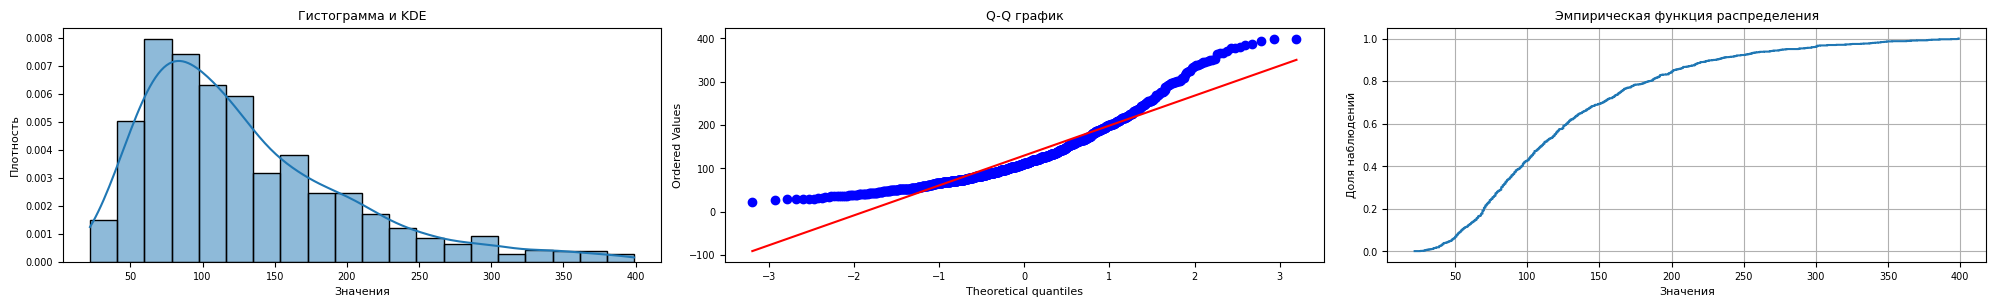

In [288]:
print(f'\nГрафики для triglyceride\n')
normality_analysis(df['triglyceride'], len(df['triglyceride']), 'triglyceride')
print(f'\nГрафики для первых 1000 значений в triglyceride')
normality_analysis(df['triglyceride'][:1000], len(df['triglyceride'][:1000]), 'triglyceride')

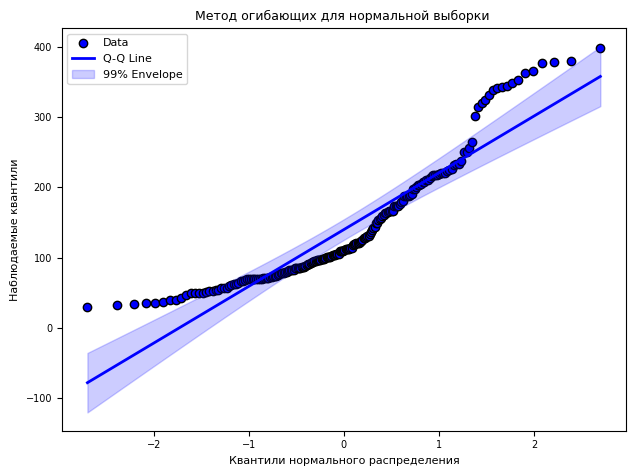

In [289]:
env(df['triglyceride'][:200], 'triglyceride')

### => опровергается гипотеза о нормальном распределении для "triglyceride"

# Второй этап

In [297]:
alphas = [0.1, 0.05, 0.01]

In [299]:
# Столбец-фактор и уровни
group_col = "smoking"
groups = sorted(df[group_col].dropna().unique())
if len(groups) != 2:
    raise ValueError(f"Ожидались 2 группы по '{group_col}', а получено: {groups}")

In [301]:
g0_val, g1_val = groups  # например, 0 - некурящий, 1 - курящий
g0 = df[df[group_col] == g0_val]
g1 = df[df[group_col] == g1_val]

num_cols = df.select_dtypes(include=[np.number]).columns.drop(group_col)

In [303]:
col = "Cholesterol"
x = g0[col].dropna()
y = g1[col].dropna()

### Стьюдент

#### Так как Стьюдент работакет только на околонормальных распределениях, рассмотрим этот тест только для Cholesterol

In [307]:
t_two, p_two = stats.ttest_ind(x, y, equal_var=False)

In [309]:
# H1: mean(smokers) > mean(non-smokers)
t_greater, p_greater = stats.ttest_ind(y, x, equal_var=False, alternative='greater')
# H1: mean(smokers) < mean(non-smokers)
t_less, p_less = stats.ttest_ind(y, x, equal_var=False, alternative='less')

In [318]:
print(f"pvalue: {p_two}")
for alpha in alphas:
        crit = 1 - alpha
        print(f"  Доверительный уровень {crit}: "
              f"{'отвергаем' if p_two < alpha else 'не отвергаем'} H0 (двусторонняя)")

pvalue: 5.9517552345130165e-08
  Доверительный уровень 0.9: отвергаем H0 (двусторонняя)
  Доверительный уровень 0.95: отвергаем H0 (двусторонняя)
  Доверительный уровень 0.99: отвергаем H0 (двусторонняя)


In [320]:
print(f"pvalue greater: {p_greater}")
print(f"pvalue less: {p_less}")
for alpha in alphas:
        crit = 1 - alpha
        dec_g = "отвергаем" if p_greater < alpha else "не отвергаем"
        dec_l = "отвергаем" if p_less < alpha else "не отвергаем"
        print(f"  {crit}: {dec_g} H0 для H1 '>' ; {dec_l} H0 для H1 '<'")

pvalue greater: 0.9999999702412239
pvalue less: 2.9758776172565083e-08
  0.9: не отвергаем H0 для H1 '>' ; отвергаем H0 для H1 '<'
  0.95: не отвергаем H0 для H1 '>' ; отвергаем H0 для H1 '<'
  0.99: не отвергаем H0 для H1 '>' ; отвергаем H0 для H1 '<'


### Оценка мощности для Стьюдента

In [316]:
chol_smokers = df[df['smoking'] == np.int64(1)]['Cholesterol'].dropna()
chol_nonsmokers = df[df['smoking'] == np.int64(0)]['Cholesterol'].dropna()

n1 = len(chol_smokers)
n0 = len(chol_nonsmokers)

mean1 = chol_smokers.mean()
mean0 = chol_nonsmokers.mean()
var1 = chol_smokers.var(ddof=1)
var0 = chol_nonsmokers.var(ddof=1)

pooled_sd = np.sqrt((var1 + var0) / 2)
effect_size = (mean1 - mean0) / pooled_sd

print("Оценка эффекта для Cholesterol (курящие vs некурящие)")
print(f"n_smokers = {n1}, n_nonsmokers = {n0}")
print(f"mean_smokers = {mean1:.3f}, mean_nonsmokers = {mean0:.3f}")
print(f"Cohen's d = {effect_size:.3f}")

analysis = TTestIndPower()
alphas = [0.1, 0.05, 0.01]

print("\nМощность t-критерия Стьюдента для фактических n (Cholesterol):")
for alpha in alphas:
    power = analysis.power(
        effect_size=abs(effect_size),
        nobs1=n1,
        ratio=n0 / n1,
        alpha=alpha
    )
    print(f"alpha = {alpha}: power = {power:.3f}")

target_power = 0.8  # целевая мощность

print(f"\nТребуемый объём выборки для достижения мощности {target_power} (равные группы):")
for alpha in alphas:
    n_required = analysis.solve_power(
        effect_size=abs(effect_size),
        power=target_power,
        alpha=alpha,
        ratio=1.0  # предполагаем равный размер групп
    )
    print(f"alpha = {alpha}: n ≈ {n_required:.1f} наблюдений в каждой группе")

Оценка эффекта для Cholesterol (курящие vs некурящие)
n_smokers = 14318, n_nonsmokers = 24666
mean_smokers = 195.572, mean_nonsmokers = 197.645
Cohen's d = -0.057

Мощность t-критерия Стьюдента для фактических n (Cholesterol):
alpha = 0.1: power = 1.000
alpha = 0.05: power = 1.000
alpha = 0.01: power = 0.998

Требуемый объём выборки для достижения мощности 0.8 (равные группы):
alpha = 0.1: n ≈ 3805.4 наблюдений в каждой группе
alpha = 0.05: n ≈ 4831.3 наблюдений в каждой группе
alpha = 0.01: n ≈ 7189.2 наблюдений в каждой группе


##### Оценённый размер эффекта различий в уровне холестерина между курящими и некурящими вляется пренебрежимо малым. При этом, благодаря очень большому объёму выборки, мощность t-критерия Стьюдента близка к 1 для всех рассматриваемых уровней значимости, то есть данные позволяют с высокой надёжностью утверждать, что статистически и тем более практически значимых различий уровней холестерина между группами в данной выборке нет.

### Критерий Манна-Уитни (ранговый)

In [97]:
def info_nammwhitney(df):
    results = []
    for col in df.columns[df.columns != 'smoking']:
        mw_two = stats.mannwhitneyu(
            df[df['smoking'] == np.int64(1)][col],
            df[df['smoking'] == np.int64(0)][col],
            alternative='two-sided'
        ).pvalue
    
        mw_right = stats.mannwhitneyu(
            df[df['smoking'] == np.int64(1)][col],
            df[df['smoking'] == np.int64(0)][col],
            alternative='greater'
        ).pvalue
    
        mw_left = stats.mannwhitneyu(
            df[df['smoking'] == np.int64(1)][col],
            df[df['smoking'] == np.int64(0)][col],
            alternative='less'
        ).pvalue
    
        results.append({
            'Feature': col,
            'Mann-Whitney_two_sided': mw_two,
            'Mann-Whitney_one_right': mw_right,
            'Mann-Whitney_one_left': mw_left,
        })
    
    results_df = pd.DataFrame(results)
    
    display_df = results_df.copy()
    for col in ['Mann-Whitney_two_sided', 'Mann-Whitney_one_right', 'Mann-Whitney_one_left']:
        display_df[col] = display_df[col].apply(
            lambda p: f'{p:.2e}' if p < 1e-4 else f'{p:.4f}'
        )
    
    print(display_df.to_string(index=False))
    
    alphas = [0.1, 0.05, 0.01]
    
    for alpha in alphas:
        ci = 1 - alpha
        print(f"\n=== Доверительный уровень {ci} ===")
        for _, row in results_df.iterrows():
            feat = row['Feature']
            dec_two = 'отвергаем H0' if row['Mann-Whitney_two_sided'] < alpha else 'не отвергаем H0'
            dec_r   = 'отвергаем H0' if row['Mann-Whitney_one_right'] < alpha else 'не отвергаем H0'
            dec_l   = 'отвергаем H0' if row['Mann-Whitney_one_left'] < alpha else 'не отвергаем H0'
            print(f"{feat}: двухсторонний — {dec_two}; правосторонний — {dec_r}; левосторонний — {dec_l}")

info_nammwhitney(df)

            Feature Mann-Whitney_two_sided Mann-Whitney_one_right Mann-Whitney_one_left
                age              2.10e-240                 1.0000             1.05e-240
         height(cm)               0.00e+00               0.00e+00                1.0000
         weight(kg)               0.00e+00               0.00e+00                1.0000
          waist(cm)               0.00e+00               0.00e+00                1.0000
     eyesight(left)               5.53e-80               2.77e-80                1.0000
    eyesight(right)               1.98e-99              9.90e-100                1.0000
      hearing(left)               1.31e-05                 1.0000              6.54e-06
     hearing(right)                 0.0002                 0.9999              8.87e-05
           systolic               2.82e-48               1.41e-48                1.0000
         relaxation               3.48e-97               1.74e-97                1.0000
fasting blood sugar             

#### Если брать всю выборку, то результаты не показывают нужного нам результата, так как при большой выборке тест Мэнна=Уитни не работают. Возьмем только первые 1000 наблюдений

In [99]:
info_nammwhitney(df[:1000])

            Feature Mann-Whitney_two_sided Mann-Whitney_one_right Mann-Whitney_one_left
                age                 0.0007                 0.9996                0.0004
         height(cm)               1.96e-31               9.80e-32                1.0000
         weight(kg)               8.19e-16               4.10e-16                1.0000
          waist(cm)               1.81e-07               9.03e-08                1.0000
     eyesight(left)                 0.0003                 0.0001                0.9999
    eyesight(right)               4.60e-05               2.30e-05                1.0000
      hearing(left)                 0.7718                 0.3859                0.6145
     hearing(right)                 0.7164                 0.3582                0.6421
           systolic                 0.0872                 0.0436                0.9564
         relaxation                 0.1098                 0.0549                0.9451
fasting blood sugar             

#### Теперь видно, что многие признаки практически не влияют на то, курит ли человек, а точнее, не влияют: зрение, давление, холестерин, Gtp, наличие кариеса, протеин в моче и другие.

### Проверка гипотез об однородности дисперсий

### Фишер (требует нормальность)

In [71]:
var_smok = chol_smokers.var(ddof=1)
var_nonsmok = chol_nonsmokers.var(ddof=1)

if var_smok >= var_nonsmok:
    F = var_smok / var_nonsmok
    dfn = len(chol_smokers) - 1  # числитель
    dfd = len(chol_nonsmokers) - 1  # знаменатель
else:
    F = var_nonsmok / var_smok
    dfn = len(chol_nonsmokers) - 1
    dfd = len(chol_smokers) - 1

# Двусторонний p-value
p_value = 2 * min(stats.f.cdf(F, dfn, dfd), 1 - stats.f.cdf(F, dfn, dfd))
print(f"p-value по Фишеру          = {p_value:.4g}")

for alpha in alphas:
    ci = 1 - alpha
    if p_value < alpha:
        decision = "отвергаем H0"
    else:
        decision = "не отвергаем H0"
    print(f"При доверительном уровне {ci}: {decision}")

p-value по Фишеру          = 0.4189
При доверительном уровне 0.9: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0


### Бартлетт (требует нормальность)

In [73]:
stat_bartlett, p_bartlett = stats.bartlett(chol_smokers, chol_nonsmokers)

print(f"Статистика по Бартлетту: {stat_bartlett:.4f}")
print(f"p-value по Бартлетту:    {p_bartlett:.4g}")

for alpha in alphas:
    ci = 1 - alpha
    if p_bartlett < alpha:
        decision = "отвергаем H0"
    else:
        decision = "не отвергаем H0"
    print(f"При доверительном уровне {ci}: {decision}")

Статистика по Бартлетту: 1.7754
p-value по Бартлетту:    0.1827
При доверительном уровне 0.9: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0


### Левен (менее чувстителен к нормальности)

In [101]:
def all_leven(df):
    features = ["Cholesterol", "triglyceride", "fasting blood sugar", "waist(cm)"]
    for col in features:
        group1 = df[df['smoking'] == np.int64(1)][col].dropna()
        group0 = df[df['smoking'] == np.int64(0)][col].dropna()
    
        stat_lev, p_lev = stats.levene(group1, group0, center='mean')
    
        print(col)
        print(f"Статистика по Левену: {stat_lev:.4f}, p-value по Левену: {p_lev:.4g}\n")
    
        for alpha in alphas:
            ci = 1 - alpha
            if p_lev < alpha:
                decision = "отвергаем H0"
            else:
                decision = "не отвергаем H0"
            print(f"При доверительном уровне {ci}: {decision}")
        print("\n\n")

all_leven(df)

Cholesterol
Статистика по Левену: 2.0489, p-value по Левену: 0.1523

При доверительном уровне 0.9: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0



triglyceride
Статистика по Левену: 1097.3833, p-value по Левену: 2.433e-237

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



fasting blood sugar
Статистика по Левену: 311.4542, p-value по Левену: 1.963e-69

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



waist(cm)
Статистика по Левену: 81.1966, p-value по Левену: 2.134e-19

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0





#### Попробуем на урезанной выборке

In [103]:
all_leven(df[:1000])

Cholesterol
Статистика по Левену: 0.7427, p-value по Левену: 0.389

При доверительном уровне 0.9: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0



triglyceride
Статистика по Левену: 26.2473, p-value по Левену: 3.605e-07

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



fasting blood sugar
Статистика по Левену: 6.5762, p-value по Левену: 0.01048

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: не отвергаем H0



waist(cm)
Статистика по Левену: 12.5877, p-value по Левену: 0.0004064

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0





### Флигнер-Килин (самый универсальный)

In [105]:
print("Тест Флигнера–Килина для всех числовых признаков\n")
def all_fligner(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        if col == 'smoking':
            continue
    
        group1 = df[df['smoking'] == np.int64(1)][col].dropna()
        group0 = df[df['smoking'] == np.int64(0)][col].dropna()
    
        stat_fli, p_fli = stats.fligner(group1, group0)
    
        print(f"{col}: статистика = {stat_fli:.4f}, p-value = {p_fli:.4g}\n")
        for alpha in alphas:
            ci = 1 - alpha
            if p_fli < alpha:
                decision = "отвергаем H0"
            else:
                decision = "не отвергаем H0"
            print(f"При доверительном уровне {ci}: {decision}")
        print("\n\n")
all_fligner(df)

Тест Флигнера–Килина для всех числовых признаков

age: статистика = 155.1283, p-value = 1.313e-35

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



height(cm): статистика = 1909.9945, p-value = 0

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



weight(kg): статистика = 26.8302, p-value = 2.221e-07

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



waist(cm): статистика = 79.3307, p-value = 5.254e-19

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



eyesight(left): статистика = 0.1731, p-value = 0.6773

При доверительном уровне 0.9: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0



eyesight(

#### Попробуем на урезанной выборке

In [81]:
all_fligner(df[:1000])

Тест Флигнера–Килина для всех числовых признаков на урезанной выборке

age: статистика = 1.4438, p-value = 0.2295

При доверительном уровне 0.9: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0



height(cm): статистика = 68.8479, p-value = 1.064e-16

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



weight(kg): статистика = 1.5983, p-value = 0.2061

При доверительном уровне 0.9: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровне 0.99: не отвергаем H0



waist(cm): статистика = 13.0101, p-value = 0.0003098

При доверительном уровне 0.9: отвергаем H0
При доверительном уровне 0.95: отвергаем H0
При доверительном уровне 0.99: отвергаем H0



eyesight(left): статистика = 0.2971, p-value = 0.5857

При доверительном уровне 0.9: не отвергаем H0
При доверительном уровне 0.95: не отвергаем H0
При доверительном уровн

## Корреляционные взаимосвязи

In [326]:
continual = ['waist(cm)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin', 'AST', 'ALT', 'Gtp']

### Пирсон (требует нормальность и отсутствие выбросов)

#### В моем случае только холестирин нормален, поэтому рассмотрю взаимрсвязь только между ним и waist (самое "околонормальное")

In [117]:
def chol_waist(df):
    chol = df['Cholesterol']
    waist = df['waist(cm)']
    
    r, p_value = stats.pearsonr(df['Cholesterol'], df['waist(cm)'])
    
    print("Корреляция Пирсона между Cholesterol и waist(cm)")
    print(f"Коэффициент корреляции = {r:.4f}")
    print(f"p-value = {p_value:.4g}")
    
    if abs(r) < 0.3:
        strength = "слабая"
    elif abs(r) < 0.7:
        strength = "умеренная"
    else:
        strength = "сильная"
    
    direction = "прямая" if r > 0 else "обратная"
    
    print(f"Связь {strength}, {direction}.")
chol_waist(df)

Корреляция Пирсона между Cholesterol и waist(cm)
Коэффициент корреляции = 0.0649
p-value = 1.046e-37
Связь слабая, прямая.


In [119]:
chol_waist(df[:1000])

Корреляция Пирсона между Cholesterol и waist(cm)
Коэффициент корреляции = 0.1071
p-value = 0.0006902
Связь слабая, прямая.


### Спирмен (не зависит от нормальности и на него мало влияют выбросы

#### Так как данный коэффицент особо ни к чему не привязан, то, чтобы не рассматривать взаимосвязь всех между всеми, рассмотрю только связь waist(cm) с остальными признаками. Ьуду сразу проверять на урезанной выборке, так как на полгных данных результаты абсолютно некорректны

In [123]:
print("Коэффициент Спирмена между waist(cm) и остальными числовыми признаками\n")
def all_spirmen(df):
    num_cols = [col for col in continual if col != 'waist(cm)']
    for col in num_cols:
        r_spearman, p_value = stats.spearmanr(df['waist(cm)'], df[col])
    
        if abs(r_spearman) < 0.3:
            strength = "слабая"
        elif abs(r_spearman) < 0.7:
            strength = "умеренная"
        else:
            strength = "сильная"
        direction = "прямая" if r_spearman > 0 else "обратная"
    
        print(f"{col}: коэффициент Спирмена = {r_spearman:.4f}, p-value = {p_value:.4g}")
        print(f"Связь {strength}, {direction}\n")
all_spirmen(df)

Коэффициент Спирмена между waist(cm) и остальными числовыми признаками

systolic: коэффициент Спирмена = 0.3220, p-value = 0
Связь умеренная, прямая

relaxation: коэффициент Спирмена = 0.2897, p-value = 0
Связь слабая, прямая

fasting blood sugar: коэффициент Спирмена = 0.2606, p-value = 0
Связь слабая, прямая

Cholesterol: коэффициент Спирмена = 0.0749, p-value = 1.372e-49
Связь слабая, прямая

triglyceride: коэффициент Спирмена = 0.3984, p-value = 0
Связь умеренная, прямая

HDL: коэффициент Спирмена = -0.3968, p-value = 0
Связь умеренная, обратная

LDL: коэффициент Спирмена = 0.0998, p-value = 7.308e-87
Связь слабая, прямая

hemoglobin: коэффициент Спирмена = 0.3996, p-value = 0
Связь умеренная, прямая

AST: коэффициент Спирмена = 0.2499, p-value = 0
Связь слабая, прямая

ALT: коэффициент Спирмена = 0.4591, p-value = 0
Связь умеренная, прямая

Gtp: коэффициент Спирмена = 0.4676, p-value = 0
Связь умеренная, прямая



In [125]:
all_spirmen(df[:1000])

systolic: коэффициент Спирмена = 0.3669, p-value = 3.227e-33
Связь умеренная, прямая

relaxation: коэффициент Спирмена = 0.2869, p-value = 2.139e-20
Связь слабая, прямая

fasting blood sugar: коэффициент Спирмена = 0.2741, p-value = 1.08e-18
Связь слабая, прямая

Cholesterol: коэффициент Спирмена = 0.1199, p-value = 0.000144
Связь слабая, прямая

triglyceride: коэффициент Спирмена = 0.4050, p-value = 9.444e-41
Связь умеренная, прямая

HDL: коэффициент Спирмена = -0.4169, p-value = 2.514e-43
Связь умеренная, обратная

LDL: коэффициент Спирмена = 0.1519, p-value = 1.406e-06
Связь слабая, прямая

hemoglobin: коэффициент Спирмена = 0.3676, p-value = 2.394e-33
Связь умеренная, прямая

AST: коэффициент Спирмена = 0.2211, p-value = 1.538e-12
Связь слабая, прямая

ALT: коэффициент Спирмена = 0.4218, p-value = 2.075e-44
Связь умеренная, прямая

Gtp: коэффициент Спирмена = 0.4560, p-value = 1.643e-52
Связь умеренная, прямая



### Кендалл (тоже особо ничего не ограничен)

#### Для сравнения также рассмотрю только waist(cm) со всеми остальными признаками

In [328]:
print("Коэффициент Кендалла между waist(cm) и остальными числовыми признаками\n")
def all_kendall(df):
    num_cols = [col for col in continual if col != 'waist(cm)']
    
    for col in num_cols:
        r_spearman, p_value = stats.kendalltau(df['waist(cm)'], df[col])
    
        if abs(r_spearman) < 0.3:
            strength = "слабая"
        elif abs(r_spearman) < 0.7:
            strength = "умеренная"
        else:
            strength = "сильная"
        direction = "прямая" if r_spearman > 0 else "обратная"
    
        print(f"{col}: коэффициент Кендалла = {r_spearman:.4f}, p-value = {p_value:.4g}")
all_kendall(df)

Коэффициент Кендалла между waist(cm) и остальными числовыми признаками

systolic: коэффициент Кендалла = 0.2232, p-value = 0
relaxation: коэффициент Кендалла = 0.2010, p-value = 0
fasting blood sugar: коэффициент Кендалла = 0.1791, p-value = 0
Cholesterol: коэффициент Кендалла = 0.0507, p-value = 8.038e-50
triglyceride: коэффициент Кендалла = 0.2729, p-value = 0
HDL: коэффициент Кендалла = -0.2741, p-value = 0
LDL: коэффициент Кендалла = 0.0677, p-value = 2.556e-87
hemoglobin: коэффициент Кендалла = 0.2758, p-value = 0
AST: коэффициент Кендалла = 0.1734, p-value = 0
ALT: коэффициент Кендалла = 0.3232, p-value = 0
Gtp: коэффициент Кендалла = 0.3266, p-value = 0


In [330]:
all_kendall(df[:1000])

systolic: коэффициент Кендалла = 0.2541, p-value = 5.609e-32
relaxation: коэффициент Кендалла = 0.1983, p-value = 6.083e-20
fasting blood sugar: коэффициент Кендалла = 0.1867, p-value = 4.286e-18
Cholesterol: коэффициент Кендалла = 0.0809, p-value = 0.0001542
triglyceride: коэффициент Кендалла = 0.2759, p-value = 3.091e-38
HDL: коэффициент Кендалла = -0.2874, p-value = 1.011e-40
LDL: коэффициент Кендалла = 0.1039, p-value = 1.164e-06
hemoglobin: коэффициент Кендалла = 0.2562, p-value = 8.601e-33
AST: коэффициент Кендалла = 0.1540, p-value = 1.263e-12
ALT: коэффициент Кендалла = 0.2959, p-value = 9.376e-43
Gtp: коэффициент Кендалла = 0.3179, p-value = 1.675e-49


In [134]:
cat_cols = [
    "height(cm)",
    "weight(kg)",
    "hearing(left)",
    "hearing(right)",
    "eyesight(left)",
    "eyesight(right)",
    "Urine protein",
    "serum creatinine",
    "dental caries"
]

## Метод хи-квадрат

In [139]:
def all_chi(df):
    for col in cat_cols:
        table = pd.crosstab(df['age'], df[col])
        chi2, p_value, dof, expected = stats.chi2_contingency(table)
    
        print(f"Связь между age и {col}:")
        print(f"  chi2 = {chi2:.4f}, df = {dof}, p-value = {p_value:.4g}")
        print()
all_chi(df)

Связь между age и height(cm):
  chi2 = 12798.1191, df = 156, p-value = 0

Связь между age и weight(kg):
  chi2 = 6673.9697, df = 273, p-value = 0

Связь между age и hearing(left):
  chi2 = 2672.7147, df = 13, p-value = 0

Связь между age и hearing(right):
  chi2 = 2862.9436, df = 13, p-value = 0

Связь между age и eyesight(left):
  chi2 = 6293.1616, df = 234, p-value = 0

Связь между age и eyesight(right):
  chi2 = 6155.1945, df = 208, p-value = 0

Связь между age и Urine protein:
  chi2 = 221.8083, df = 65, p-value = 5.344e-19

Связь между age и serum creatinine:
  chi2 = 4444.0772, df = 429, p-value = 0

Связь между age и dental caries:
  chi2 = 604.2256, df = 13, p-value = 9.633e-121



In [141]:
all_chi(df[:1000])

Связь между age и height(cm):
  chi2 = 486.6138, df = 120, p-value = 1.242e-45

Связь между age и weight(kg):
  chi2 = 320.8764, df = 204, p-value = 3.194e-07

Связь между age и hearing(left):
  chi2 = 43.1937, df = 12, p-value = 2.094e-05

Связь между age и hearing(right):
  chi2 = 88.6372, df = 12, p-value = 9.059e-14

Связь между age и eyesight(left):
  chi2 = 371.7722, df = 168, p-value = 1.887e-17

Связь между age и eyesight(right):
  chi2 = 336.2585, df = 156, p-value = 2.865e-15

Связь между age и Urine protein:
  chi2 = 41.4147, df = 48, p-value = 0.7378

Связь между age и serum creatinine:
  chi2 = 434.6342, df = 180, p-value = 4.271e-23

Связь между age и dental caries:
  chi2 = 19.9714, df = 12, p-value = 0.06763



### Точный тест Фишера

#### Данный тест работает корректно только на таблицах вида 2x2, так что будем проверять связь курения с другими бинарнами признаками

In [145]:
cat_bin = [
    "hearing(left)",
    "hearing(right)",
    "dental caries"
]

In [151]:
print("Точный тест Фишера")
def all_fisher(df):
    for col in cat_bin:
        table = pd.crosstab(df['smoking'], df[col])
    
        # Точный тест Фишера в стандартной реализации — только для 2x2
        oddsratio, p_value = stats.fisher_exact(table)
        print(f"{col}:")
        print(f"  odds ratio = {oddsratio:.4f}, p-value = {p_value:.4g}")
all_fisher(df)

Точный тест Фишера
hearing(left):
  odds ratio = 0.7375, p-value = 1.169e-05
hearing(right):
  odds ratio = 0.7743, p-value = 0.000174
dental caries:
  odds ratio = 1.6965, p-value = 4.405e-98


In [153]:
all_fisher(df[:1000])

hearing(left):
  odds ratio = 1.1411, p-value = 0.8187
hearing(right):
  odds ratio = 1.1602, p-value = 0.6838
dental caries:
  odds ratio = 1.3179, p-value = 0.07998


### Тест МакНамара

#### Аналогично Фишеру только для пары бинарных признаков

In [159]:
print("Тест МакНамара:")
def all_mcnamar(df):
    for col in cat_bin:
        table = pd.crosstab(df['smoking'], df[col])
    
        # Точный тест Фишера в стандартной реализации — только для 2x2
        result = mcnemar(table, exact=False, correction=True)
        print(f"{col}:")
        print(f"  statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4g}")
all_mcnamar(df)

Тест МакНамара:
hearing(left):
  statistic = 23973.0000, p-value = 0
hearing(right):
  statistic = 23961.0000, p-value = 0
dental caries:
  statistic = 2386.0835, p-value = 0


In [161]:
all_mcnamar(df[:1000])

hearing(left):
  statistic = 634.0016, p-value = 6.738e-140
hearing(right):
  statistic = 631.0016, p-value = 3.027e-139
dental caries:
  statistic = 41.4785, p-value = 1.192e-10


#### Делаем вывод, что между курением и данными признаками никакой связи нет

### Тест Кохрана-Мантеля-Хензеля

In [163]:
def all_cmh(df):
    df_cmh = df[['smoking', 'age', 'dental caries']].dropna()
    bins = [0, 40, 60, np.inf]
    labels = ['<40', '40-59', '60+']
    df_cmh['age_group'] = pd.cut(df_cmh['age'], bins=bins, labels=labels, right=False)
    
    tables = []
    for ag, group in df_cmh.groupby('age_group'):
        tbl = pd.crosstab(group['smoking'], group['dental caries'])
        tables.append(tbl.values)
        print(f"\nВозрастная группа {ag}:")
        print(tbl)
    
    cmh = StratifiedTable(tables)
    test_res = cmh.test_null_odds()
    
    print("Проверка связи между 'smoking' и 'dental caries' с контролем по возрастным группам")
    print(f"CMH статистика = {test_res.statistic:.4f}")
    print(f"p-value = {test_res.pvalue:.4g}")
all_cmh(df)


Возрастная группа <40:
dental caries     0     1
smoking                  
0              3673  1162
1              3135  1638

Возрастная группа 40-59:
dental caries      0     1
smoking                   
0              12421  2571
1               5986  1987

Возрастная группа 60+:
dental caries     0    1
smoking                 
0              4113  726
1              1297  275
Проверка связи между 'smoking' и 'dental caries' с контролем по возрастным группам
CMH статистика = 313.3828
p-value = 0


In [165]:
all_cmh(df[:1000])


Возрастная группа <40:
dental caries    0   1
smoking               
0              106  33
1               74  38

Возрастная группа 40-59:
dental caries    0   1
smoking               
0              313  80
1              153  42

Возрастная группа 60+:
dental caries   0   1
smoking              
0              97  20
1              35   9
Проверка связи между 'smoking' и 'dental caries' с контролем по возрастным группам
CMH статистика = 2.0544
p-value = 0.1518


### Проверка мультиколлинеарности

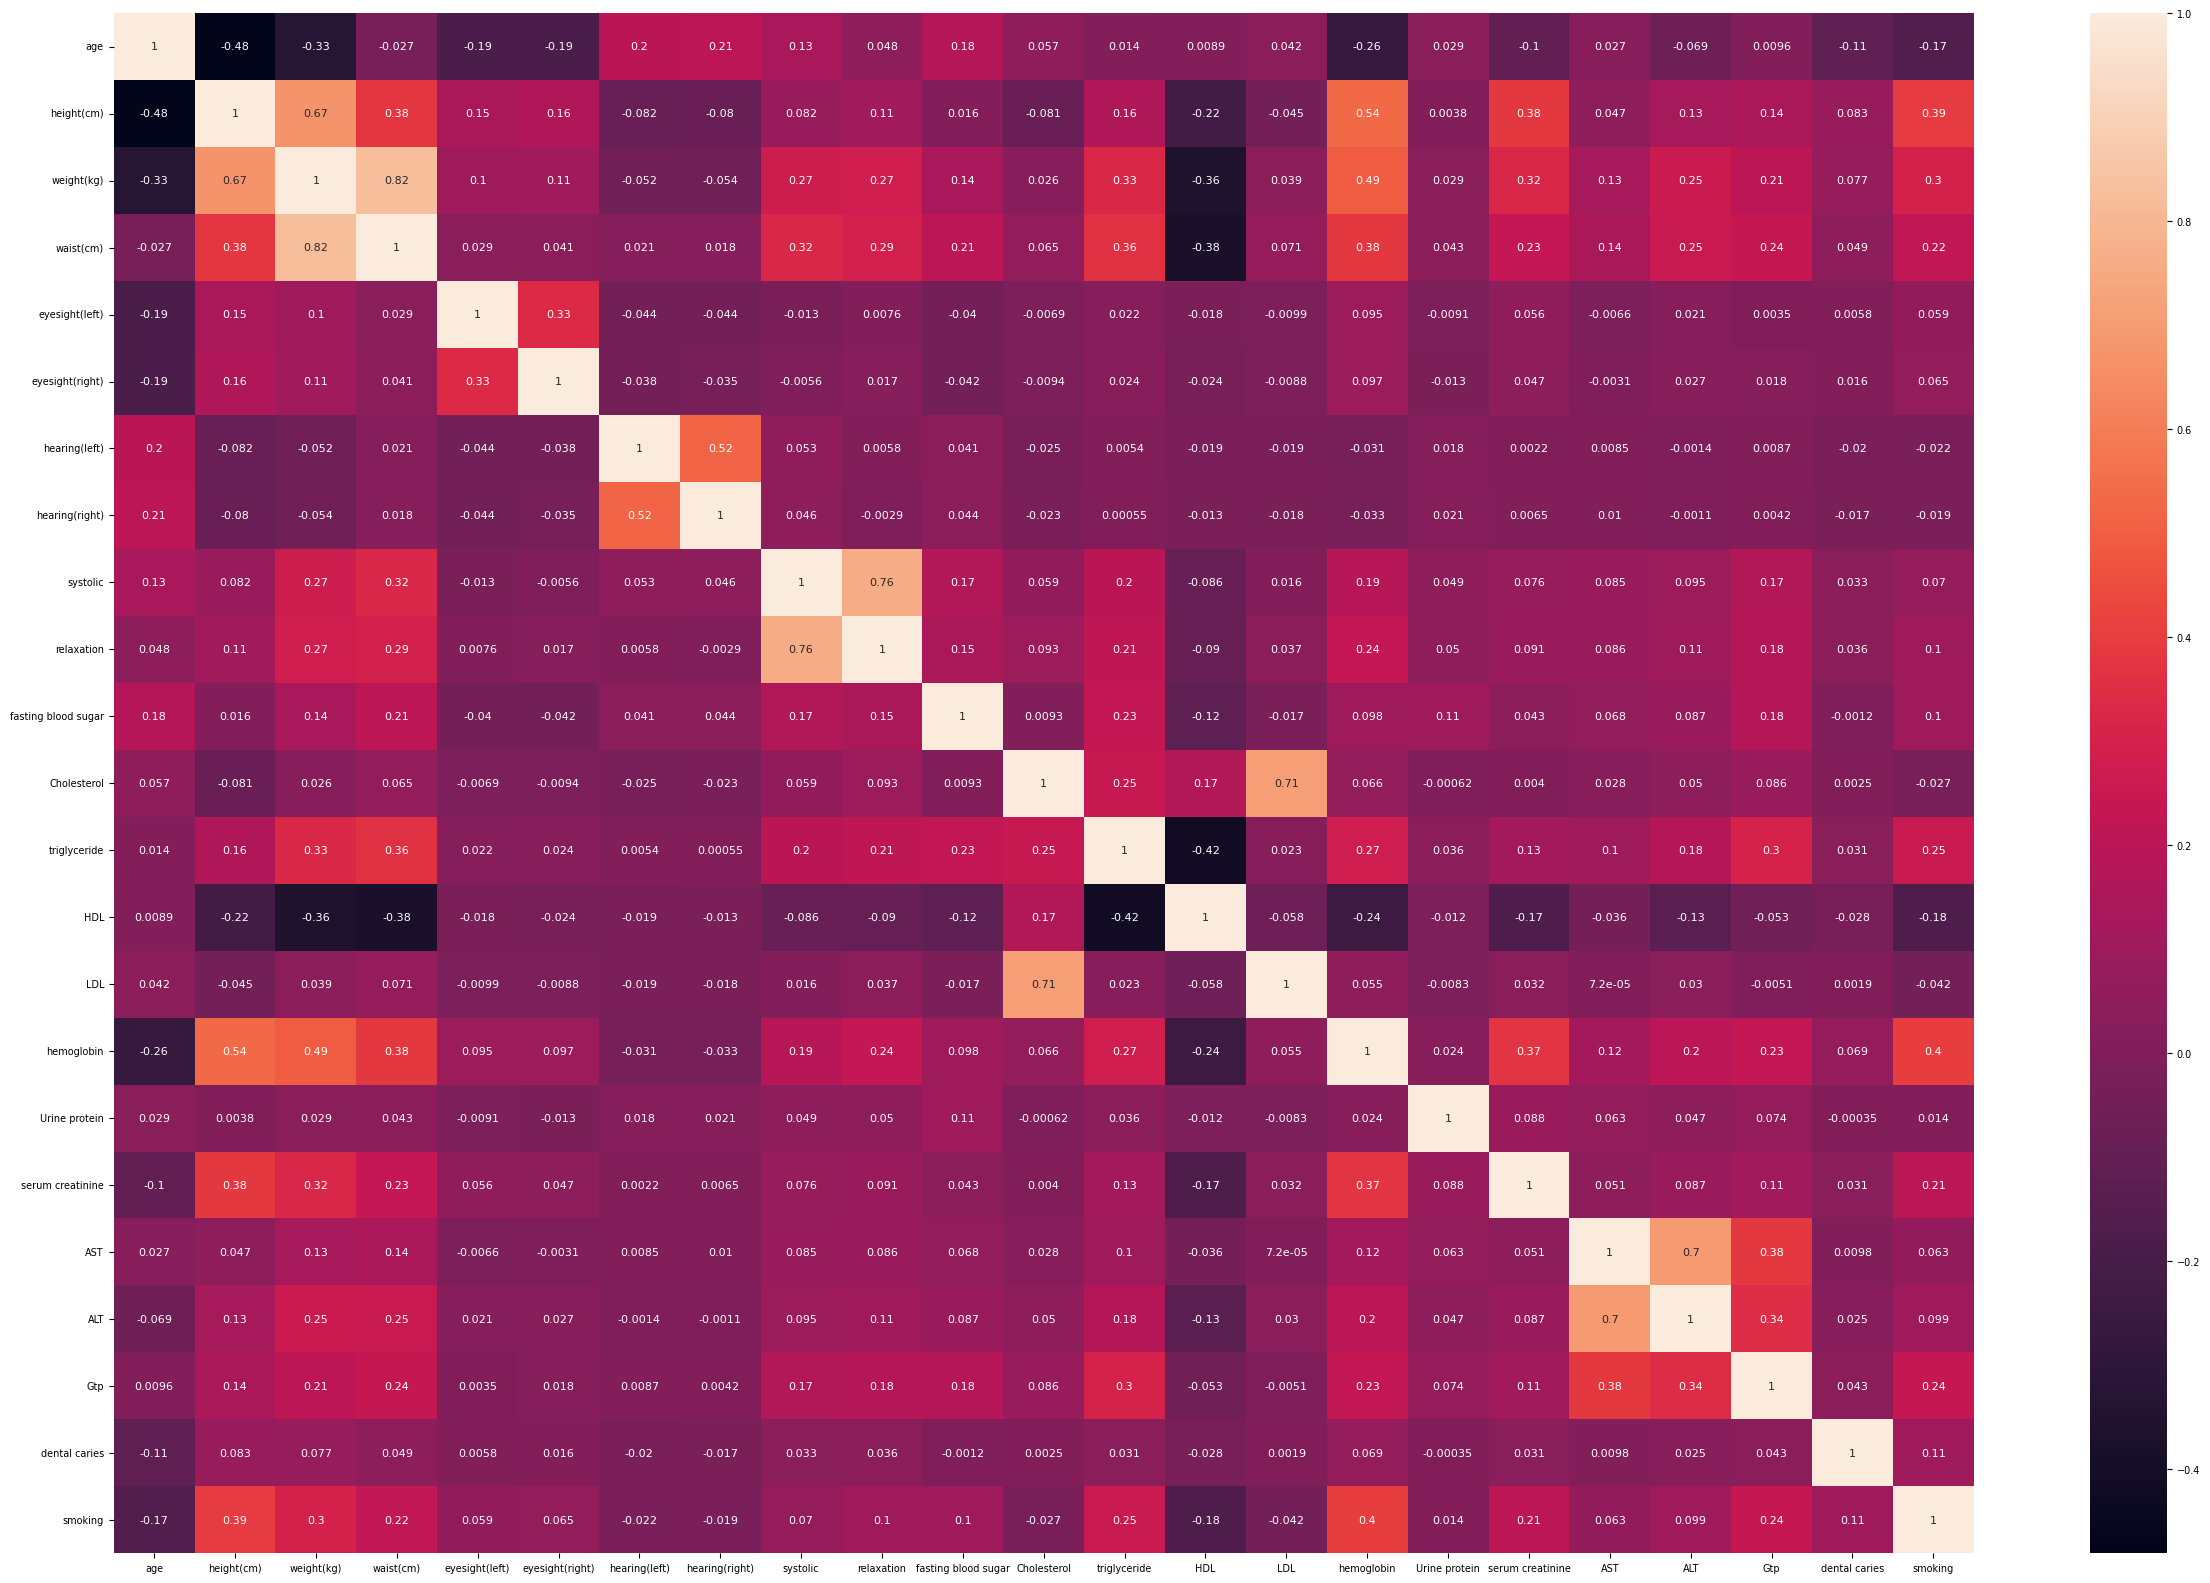

In [340]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

plt.savefig("correl_pirson.png")

In [167]:
def all_disp(df):
    num_df = df.select_dtypes(include=[np.number]).copy()
    num_df_vif = num_df.drop(columns=['smoking'])
    
    # Добавляем константу для регрессии
    X = sm.add_constant(num_df_vif)
    
    vif_data = []
    for i, col in enumerate(X.columns):
        if col == 'const':
            continue
        vif = variance_inflation_factor(X.values, i)
        vif_data.append({"Feature": col, "VIF": vif})
    
    vif_df = pd.DataFrame(vif_data)
    vif_df = vif_df.sort_values(by="VIF", ascending=False)
    
    print("\nФактор инфляции дисперсии:")
    print(vif_df.to_string(index=False))
all_disp(df)

# VIF ~ 1 : мультиколлинеарности нет
# VIF 1–5 : допустимая корреляция
# VIF > 5: серьёзная мультиколлинеарность


Фактор инфляции дисперсии:
            Feature      VIF
         weight(kg) 6.780861
          waist(cm) 4.546156
        Cholesterol 3.023763
         height(cm) 2.790411
                LDL 2.550143
           systolic 2.507508
         relaxation 2.448601
                ALT 2.110145
                AST 2.093829
       triglyceride 1.866815
                HDL 1.793509
                age 1.719090
         hemoglobin 1.665384
     hearing(right) 1.390675
      hearing(left) 1.387101
                Gtp 1.360017
   serum creatinine 1.258455
    eyesight(right) 1.153497
fasting blood sugar 1.150280
     eyesight(left) 1.150241
      Urine protein 1.025130
      dental caries 1.018152


### Дисперсионный анализ

In [344]:
features = list(df.columns)
features.remove('smoking')

In [348]:
results = []
for col in features:
    anova = stats.kruskal(df[df['smoking']==np.int64(1)][col],df[df['smoking']==np.int64(0)][col]).pvalue
    results.append({
        'Feature': col,
        'Kruskal': anova})
                   
results_df = pd.DataFrame(results)
for col in ['Kruskal']:
    results_df[col] = results_df[col].apply(lambda p: f"{p:.2e}" if p < 1e-4 else f"{p:.4f}")
print(results_df.to_string(index=False))

            Feature   Kruskal
                age 2.10e-240
         height(cm)  0.00e+00
         weight(kg)  0.00e+00
          waist(cm)  0.00e+00
     eyesight(left)  5.53e-80
    eyesight(right)  1.98e-99
      hearing(left)  1.31e-05
     hearing(right)    0.0002
           systolic  2.82e-48
         relaxation  3.48e-97
fasting blood sugar  9.44e-91
        Cholesterol  9.78e-07
       triglyceride  0.00e+00
                HDL  0.00e+00
                LDL  2.17e-24
         hemoglobin  0.00e+00
      Urine protein    0.0295
   serum creatinine  0.00e+00
                AST  2.72e-91
                ALT  0.00e+00
                Gtp  0.00e+00
      dental caries 3.68e-100


In [352]:
df_small = df[:1000]
results = []
for col in features:
    anova = stats.kruskal(df_small[df_small['smoking']==np.int64(1)][col],df_small[df_small['smoking']==np.int64(0)][col]).pvalue
    results.append({
        'Feature': col,
        'Kruskal': anova})
                   
results_df = pd.DataFrame(results)
results_df['Kruskal'] = results_df['Kruskal'].apply(lambda p: f"{p:.2e}" if p < 1e-4 else f"{p:.4f}")
print(results_df.to_string(index=False))

            Feature  Kruskal
                age   0.0007
         height(cm) 1.96e-31
         weight(kg) 8.19e-16
          waist(cm) 1.80e-07
     eyesight(left)   0.0003
    eyesight(right) 4.59e-05
      hearing(left)   0.7714
     hearing(right)   0.7161
           systolic   0.0872
         relaxation   0.1098
fasting blood sugar   0.0003
        Cholesterol   0.2363
       triglyceride 9.76e-12
                HDL 3.60e-08
                LDL   0.0813
         hemoglobin 1.97e-28
      Urine protein   0.5598
   serum creatinine 1.53e-21
                AST 2.37e-05
                ALT 1.64e-10
                Gtp 1.32e-30
      dental caries   0.0775


In [111]:
results = []
for col in features:
    anova = stats.f_oneway(df[df['smoking']==np.int64(1)][col],df[df['smoking']==np.int64(0)][col]).pvalue
    results.append({
        'Feature': col,
        'ANOVA': anova})
                   
results_df = pd.DataFrame(results)
for col in ['ANOVA']:
    results_df[col] = results_df[col].apply(lambda p: f"{p:.2e}" if p < 1e-4 else f"{p:.4f}")
print(results_df.to_string(index=False))

            Feature     ANOVA
                age 1.20e-239
         height(cm)  0.00e+00
         weight(kg)  0.00e+00
          waist(cm)  0.00e+00
     eyesight(left)  7.96e-32
    eyesight(right)  2.57e-37
      hearing(left)  1.30e-05
     hearing(right)    0.0002
           systolic  9.30e-44
         relaxation  1.36e-93
fasting blood sugar  4.87e-87
        Cholesterol  5.66e-08
       triglyceride  0.00e+00
                HDL 1.24e-279
                LDL  2.00e-16
         hemoglobin  0.00e+00
      Urine protein    0.0070
   serum creatinine  0.00e+00
                AST  2.09e-35
                ALT  7.75e-85
                Gtp  0.00e+00
      dental caries 9.93e-101


#### Если брать всю выборку, то результаты не показывают нужного нам результата, так как при большой выборке тест ANOVA не работает. Возьмем только первые 1000 наблюдений

In [113]:
df_small = df[:1000]
results = []
for col in features:
    anova = stats.f_oneway(df_small[df_small['smoking']==np.int64(1)][col],df_small[df_small['smoking']==np.int64(0)][col]).pvalue
    results.append({
        'Feature': col,
        'ANOVA': anova})
                   
results_df = pd.DataFrame(results)
results_df['ANOVA'] = results_df['ANOVA'].apply(lambda p: f"{p:.2e}" if p < 1e-4 else f"{p:.4f}")
print(results_df.to_string(index=False))

            Feature    ANOVA
                age   0.0006
         height(cm) 8.58e-34
         weight(kg) 4.75e-14
          waist(cm) 4.42e-07
     eyesight(left)   0.0134
    eyesight(right)   0.0140
      hearing(left)   0.7716
     hearing(right)   0.7163
           systolic   0.0911
         relaxation   0.1535
fasting blood sugar   0.0010
        Cholesterol   0.3181
       triglyceride 5.47e-13
                HDL 1.84e-07
                LDL   0.2720
         hemoglobin 2.18e-29
      Urine protein   0.6226
   serum creatinine 2.42e-20
                AST   0.4983
                ALT   0.1510
                Gtp 2.21e-16
      dental caries   0.0775


#### Теперь видно, что многие признаки практически не влияют на то, курит ли человек, а точнее, не влияют: зрение, давление, холестерин, Gtp, наличие кариеса, протеин в моче и другие.

## Регрессионные модели

In [116]:
def ConfusionMatrix(Y_test, Y_pred):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred))
    disp.plot()
    disp.ax_.grid(False) 
    plt.show()

In [117]:
def RocCurve(y_test_, y_prob_):
    fpr, tpr, _ = roc_curve(y_test_, y_prob_)
    roc_auc = auc(fpr, tpr)
    
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, lw=3, label=f"AUC = {roc_auc:.2f}")
    ax.plot([0, 1], [0, 1], '--', lw=3)
    
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC")
    ax.legend(loc="lower right")
    plt.show()

In [118]:
df['eyesight(left)'] = df['eyesight(left)'].replace(9.9, df['eyesight(left)'].median())
df['eyesight(right)'] = df['eyesight(right)'].replace(9.9, df['eyesight(right)'].median())

X = df.drop('smoking', axis=1)
y = df['smoking']

### Линейная: Logistic Regression

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
acc_log = accuracy_score(y_test, y_pred_log)
auc_log = roc_auc_score(y_test, y_prob_log)
print("Линейная логистическая регрессия:")
print(f"Accuracy: {acc_log:.4f}")
print(f"ROC AUC: {auc_log:.4f}")

Линейная логистическая регрессия:
Accuracy: 0.7272
ROC AUC: 0.8079


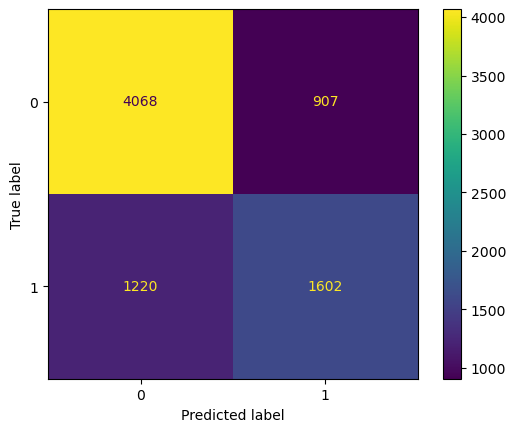

In [122]:
ConfusionMatrix(y_test, y_pred_log)

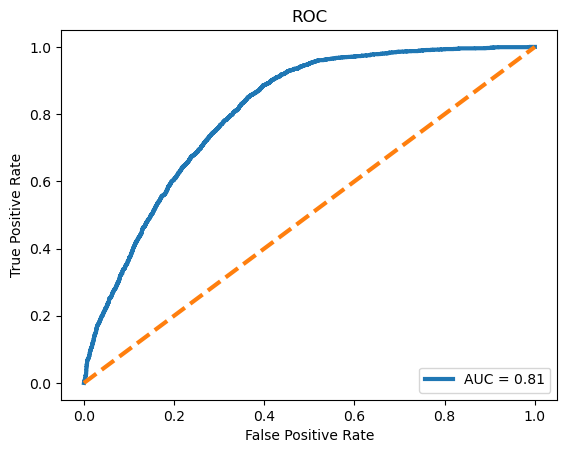

In [123]:
RocCurve(y_test, y_prob_log)

### Нелинейная модель: Random Forest (ensemble, нелинейный)

In [190]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
print("\nRandom Forest (нелинейная модель):")
print(f"Accuracy: {acc_rf:.4f}")
print(f"ROC AUC: {auc_rf:.4f}")


Random Forest (нелинейная модель):
Accuracy: 0.8022
ROC AUC: 0.8876


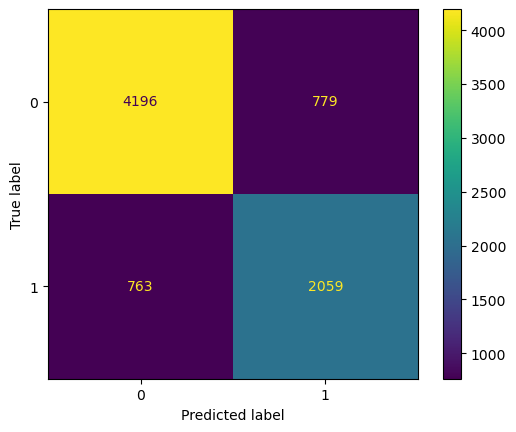

In [192]:
ConfusionMatrix(y_test, y_pred_rf)

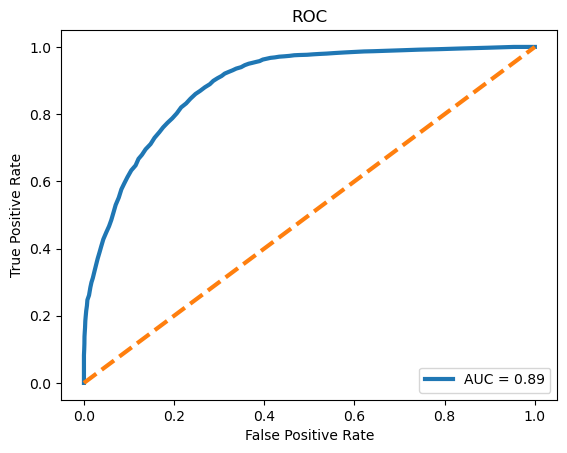

In [194]:
RocCurve(y_test, y_prob_rf)


=== ЛИНЕЙНАЯ РЕГРЕССИЯ: waist ~ BMI ===
Уравнение: waist = 29.1611 + 2.1878 * BMI
R² = 0.6754,  MSE = 28.2338,  RMSE = 5.3135


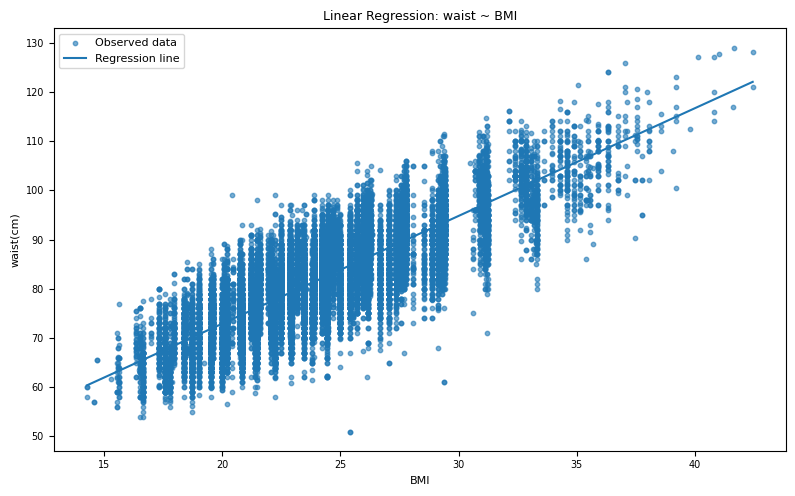


=== ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ степени 2: waist ~ BMI + BMI² ===
Уравнение: waist = 18.6887 + 3.0372 * BMI + -0.0169 * BMI²
R² = 0.6765,  MSE = 28.1362,  RMSE = 5.3044


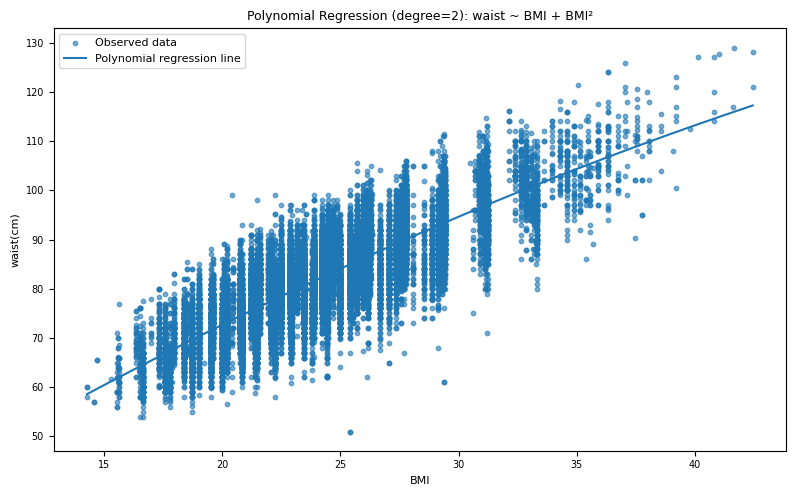


=== МНОЖЕСТВЕННАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ: waist ~ BMI + age (+ gender) ===
                            OLS Regression Results                            
Dep. Variable:              waist(cm)   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 4.069e+04
Date:                Sat, 22 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:23:57   Log-Likelihood:            -1.2039e+05
No. Observations:               38984   AIC:                         2.408e+05
Df Residuals:                   38981   BIC:                         2.408e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

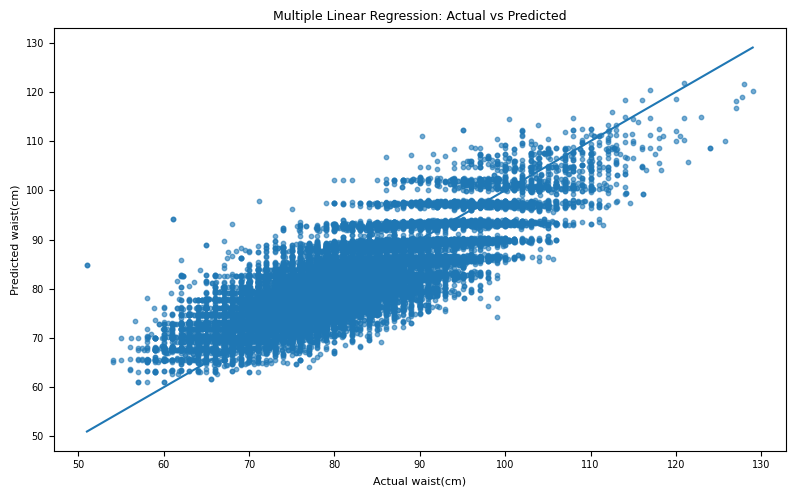

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import statsmodels.api as sm

# -----------------------------
# ЗАГРУЗКА ДАННЫХ
# -----------------------------
df = pd.read_csv("smoker.csv")

# -----------------------------
# РАСЧЁТ BMI
# -----------------------------
h_m = df['height(cm)'] / 100
df['BMI'] = (df['weight(kg)'] / (h_m**2)).replace([np.inf, -np.inf], np.nan)

# -----------------------------
# ДАННЫЕ ДЛЯ РЕГРЕССИЙ
# -----------------------------
data = df[['waist(cm)', 'BMI']].dropna()
data = data[(data['BMI'] > 10) & (data['BMI'] < 60)]

X = data[['BMI']].values
y = data['waist(cm)'].values

xx = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# -----------------------------
# 1) ЛИНЕЙНАЯ РЕГРЕССИЯ
# -----------------------------
lin = LinearRegression().fit(X, y)
y_pred_lin = lin.predict(X)
yy_lin = lin.predict(xx)

r2_lin = r2_score(y, y_pred_lin)
mse_lin = mean_squared_error(y, y_pred_lin)
rmse_lin = root_mean_squared_error(y, y_pred_lin,)

print("\n=== ЛИНЕЙНАЯ РЕГРЕССИЯ: waist ~ BMI ===")
print(f"Уравнение: waist = {lin.intercept_:.4f} + {lin.coef_[0]:.4f} * BMI")
print(f"R² = {r2_lin:.4f},  MSE = {mse_lin:.4f},  RMSE = {rmse_lin:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=10, alpha=0.6, label="Observed data")
plt.plot(xx, yy_lin, label="Regression line")
plt.xlabel("BMI")
plt.ylabel("waist(cm)")
plt.title("Linear Regression: waist ~ BMI")
plt.legend()
plt.tight_layout()
plt.savefig("reg_linear_waist_on_bmi.png", dpi=150)
plt.show()

# -----------------------------
# 2) ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ 2 СТЕПЕНИ
# -----------------------------
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

lin2 = LinearRegression().fit(X_poly, y)
y_pred_poly = lin2.predict(X_poly)

xx_poly = poly.transform(xx)
yy_poly = lin2.predict(xx_poly)

r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
rmse_poly = root_mean_squared_error(y, y_pred_poly)

print("\n=== ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ степени 2: waist ~ BMI + BMI² ===")
print(f"Уравнение: waist = {lin2.intercept_:.4f} "
      f"+ {lin2.coef_[1]:.4f} * BMI "
      f"+ {lin2.coef_[2]:.4f} * BMI²")
print(f"R² = {r2_poly:.4f},  MSE = {mse_poly:.4f},  RMSE = {rmse_poly:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=10, alpha=0.6, label="Observed data")
plt.plot(xx, yy_poly, label="Polynomial regression line")
plt.xlabel("BMI")
plt.ylabel("waist(cm)")
plt.title("Polynomial Regression (degree=2): waist ~ BMI + BMI²")
plt.legend()
plt.tight_layout()
plt.savefig("reg_poly2_waist_on_bmi.png", dpi=150)
plt.show()

# -----------------------------
# 3) МНОЖЕСТВЕННАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ
# -----------------------------
cols = ['waist(cm)', 'BMI', 'age']
if 'gender' in df.columns:
    cols.append('gender')

multi = df[cols].dropna().copy()

# дамми кодирование пола
if 'gender' in multi.columns and not np.issubdtype(multi['gender'].dtype, np.number):
    multi = pd.get_dummies(multi, columns=['gender'], drop_first=True)

y_m = multi['waist(cm)']
X_m = multi.drop(columns=['waist(cm)'])
X_m_sm = sm.add_constant(X_m)

model_multi = sm.OLS(y_m, X_m_sm).fit()
y_pred_multi = model_multi.predict(X_m_sm)

print("\n=== МНОЖЕСТВЕННАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ: waist ~ BMI + age (+ gender) ===")
print(model_multi.summary())

plt.figure(figsize=(8, 5))
plt.scatter(y_m, y_pred_multi, s=10, alpha=0.6)
mn, mx = float(min(y_m.min(), y_pred_multi.min())), float(max(y_m.max(), y_pred_multi.max()))
plt.plot([mn, mx], [mn, mx])
plt.xlabel("Actual waist(cm)")
plt.ylabel("Predicted waist(cm)")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.savefig("reg_multiple_waist_actual_vs_pred.png", dpi=150)
plt.show()
